# Prediction of Diabetes Patient Readmission to Hospital

##### Problem_Statement: As the US healthcare system moves towards value-based care, CMS (Centres for Medicare and Medicaid Services) has created many programs to improve the quality of care of patients, one such program is HRRP (Hospital Readmission Reduction Program). Hospital readmission is when a patient who is discharged gets readmitted to the hospital within a certain period of time(less than 30 days). Hospital Readmission Rates (HRP) are considered as an indicator of the quality of the hospital and also increases the cost of care immensely. Considering these, CMS penalizes hospitals (reduces reimbursement) whose HRP is above the average HRP. American hospitals spend over 41 billion dollars on diabetes patients only in the year 2011, who got re-admitted within 30 days of discharge (according to the study by Healthcare Research and Quality).

##### Objective of the project: Being able to determine the factors that influence the readmission in diabetes patients and correspondingly being able to predict the patients whose chances of getting re-admitted to the hospital (within 30 days) is higher can help hospitals save millions of dollars while improving the quality of care.

#### Importing the libraries necessary for building our model

In [314]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [315]:
df = pd.read_csv('diabetic_data.csv')
pd.set_option('Display.max_columns',None)

In [316]:
df.head() ## Reading the first five rows of our dataset to check features available, size, shape and datatypes

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1          None   
1                 0     276  250.01    255                 9          None   
2                 1     648     250    V27                 6          None   
3                 0       8  250.43    403                 7          None   
4                 0     197     157    250                 5          None   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0      None        No          No          No             No          No   
1      None        No          No          No             No          No   
2      None        No          No          No             No          No   
3      None        No          No          No             No          No   
4      None        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

#### Checking the shape of the dataset

In [317]:
df.shape
print('The dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset contains 101766 rows and 50 columns


## Features and their description

##### 1. Encounter Id      -  Unique identifier of an encounter
##### 2. Patient Number -  Unique identifier of a patient
##### 3. Race                   -  Caucasian, Asian, African American, Hispanic and Other
##### 4. Gender - Categorized into Male, Female and Unknown/Invalid
##### 5. Age - Grouped in 10-year intervals: [(0-10), (10-20).....,(90-100)]
##### 6. Weight - Weight in pounds (grouped in 25 kg)
##### 7. Admission_Type_id - Integer identifier corresponding to 8 different categories (Emergency, Urgent, Elective, Newborn, Not Available, NULL,Trauma Center, Not Mapped)
##### 8. Discharge_disposition_id - Integer identifier corresponding to 26 different categories 
(Discharged to home, Discharged/transferred to another short term hospital, Discharged/transferred to SNF, Discharged/transferred to ICF, Discharged/transferred to another type of inpatient care institution, Discharged/transferred to home with home health service, Left AMA, Discharged/transferred to home under care of Home IV provider, Admitted as an inpatient to this hospital, Neonate discharged to another hospital for neonatal aftercare, Expired, Still patient or expected to return for outpatient services, Hospice / home, Hospice / medical facility, Discharged/transferred within this institution to Medicare approved swing bed, Discharged/transferred/referred another institution for outpatient services, Discharged/transferred/referred to this institution for outpatient services, NULL, Expired at home. Medicaid only, hospice, Expired in a medical facility. Medicaid only, hospice, Expired, place unknown. Medicaid only, hospice, Discharged/transferred to another rehab fac including rehab units of a hospital, Discharged/transferred to a long term care hospital, Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare, Not Mapped, Unknown/Invalid, Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere, Discharged/transferred to a federal health care facility, Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital, Discharged/transferred to a Critical Access Hospital (CAH).)
##### 9. Admission_source_id - Integer identifier corresponding to 26 different categories.
(Physician Referral, Clinic Referral, HMO Referral, Transfer from a hospital, Transfer from a Skilled Nursing Facility (SNF), Transfer from another health care facility, Emergency Room, Court/Law Enforcement, Not Available, Transfer from critial access hospital, Normal Delivery, Premature Delivery, Sick Baby, Extramural Birth, Not Available, NULL, Transfer From Another Home Health Agency, Readmission to Same Home Health Agency, Not Mapped, Unknown/Invalid, Transfer from hospital inpt/same fac reslt in a sep claim, Born inside this hospital, Born outside this hospital, Transfer from Ambulatory Surgery Center, Transfer from Hospice
##### 10. Time in hospital - Number of days from admission to discharge
##### 11. Payer code - Identifier corresponding to 18 distinct values for example Blue Cross, Self Pay, etc
##### 12. Medical Speciality - Identifier corresponding to 73 distinct values for example Internal Medicine, Emergency/Trauma etc
##### 13. Number of lab procedures - Number of lab tests performed during the encounter
##### 14. Number of procudures -  Number of procedures (other than lab tests) performed during the encounter
##### 15. Number of medications - Number of distinct generic names administered during the encounter
##### 16. Number of outpatient visits - Number of outpatient visits of the patient in the year preceding the encounter
##### 17. Number of emergency visits - Number of emergency visits of the patient in the year preceding the encounter
##### 18. Number of inpatient visits - Number of inpatient visits of the patient in the year preceding the encounter
##### 19. Diagnosis 1 - The primary diagnosis (coded as first three digits of ICD9)
##### 20. Diagnosis 2 - The secondary diagnosis (coded as first three digits of ICD9)
##### 21. Disgnosis 3 -  Additional secondary diagnosis (coded as first three digits of ICD9)
##### 22. Number of diagnoses - Number of diagnoses entered to the system
##### 23. Glucose serum test results - Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
##### 24. A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
##### 25. Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
##### 26. Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
##### 27. 24 different kind of medical drugs.  The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
##### 28. Readmitted Days to inpatient readmission. Values: “❤0” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

## Checking the datatypes

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [319]:
df.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

In [320]:
i = ['admission_source_id','admission_type_id','discharge_disposition_id']
df[i] = df[i].astype('object')

In [321]:
df = df.replace('?', np.nan)

df.isnull().sum().sort_values(ascending = False).head(8)

weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
dtype: int64

#### Filling the missing values of race with the mode of the feature (i.e. most frequently occuring value)

In [322]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

<AxesSubplot:ylabel='race'>

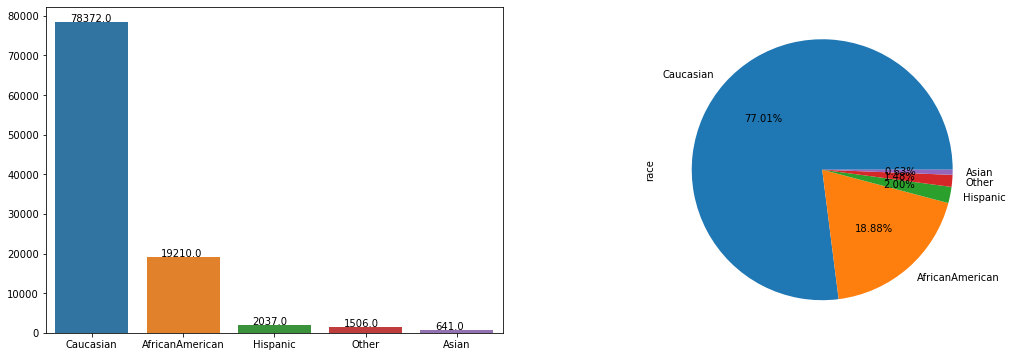

In [323]:
fig,axes = plt.subplots(1,2, figsize = (18,6))
plot = sns.barplot(data=df, x=df['race'].value_counts().index, y = df['race'].value_counts().values, ax = axes[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/5, p.get_height()+100))
df['race'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', ax = axes[1])

In [324]:
df['race'].value_counts(normalize = True)

Caucasian          0.770120
AfricanAmerican    0.188766
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

#### From the above bar and pie chart we can clearly see that Caucasian race are domination with close to 77%, followed by AfricanAmerican with around 19%

## Gender Column

<AxesSubplot:ylabel='gender'>

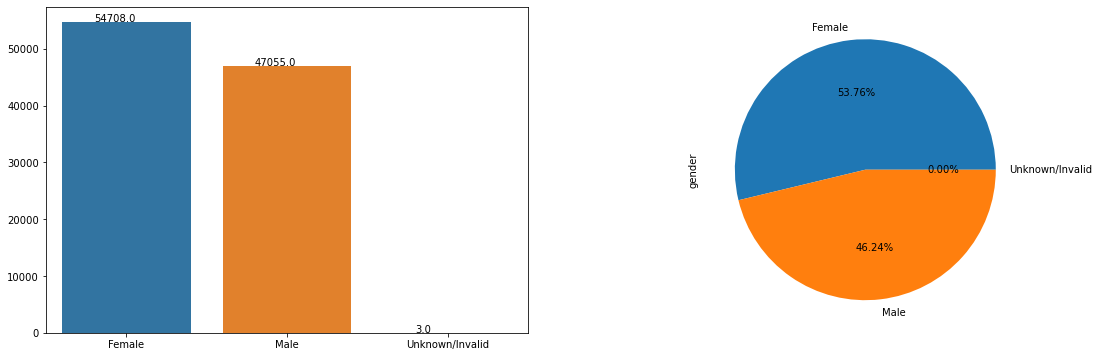

In [325]:
fig,ax = plt.subplots(1,2, figsize = (19,6))
plot = sns.barplot(data=df, x=df['gender'].value_counts().index, y=df['gender'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['gender'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### From the bar and pie chart we can see that more number of female patients are visiting the hospital when compared to male patients. It can also be seen that there is about 3 unKnown/Invalid values in our feature. We will be dropping those values from our dataset

In [326]:
i = df[(df['gender']=='Unknown/Invalid')].index

df = df.drop(i)

## Age Feature

<AxesSubplot:ylabel='age'>

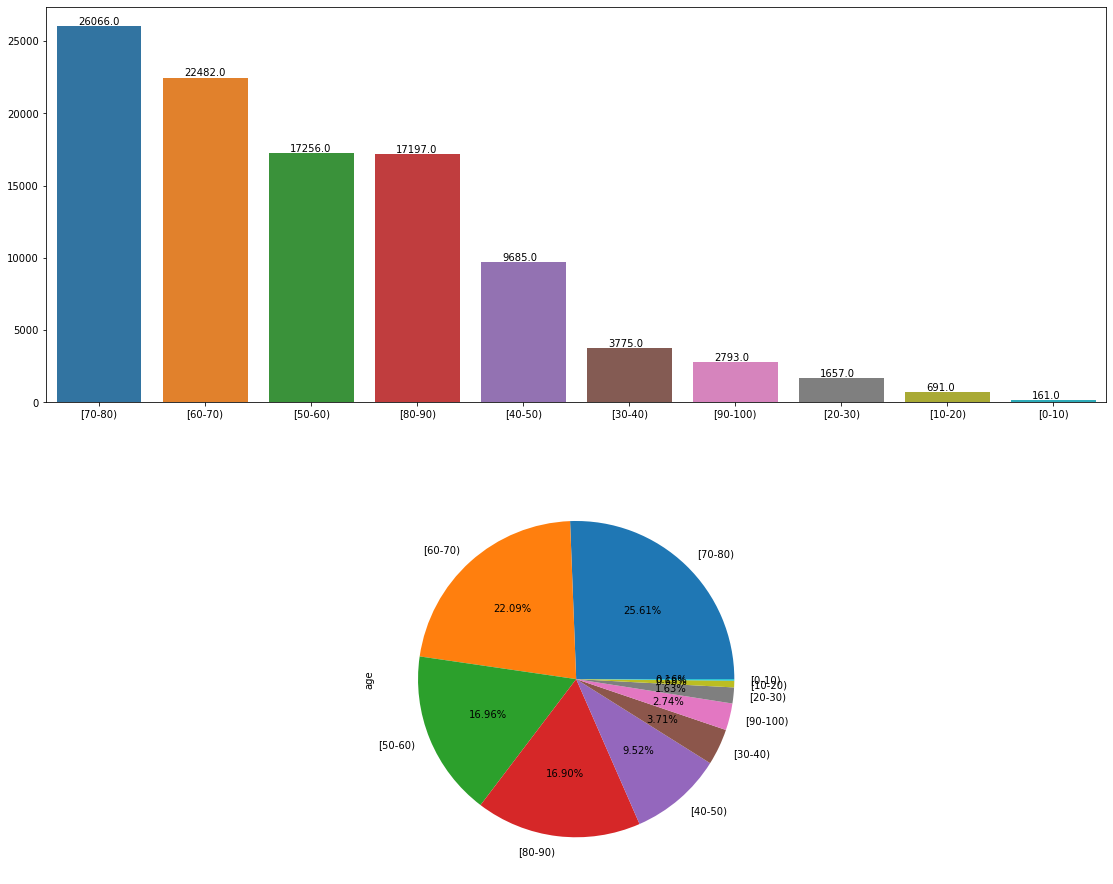

In [327]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['age'].value_counts().index, y=df['age'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['age'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

In [328]:
df['age'] = df['age'].map({'[0-10)':5,
                            '[10-20)':15,
                            '[20-30)':25,
                            '[30-40)':35,
                            '[40-50)':45,
                            '[50-60)':55,
                            '[60-70)':65,
                            '[70-80)':75,
                            '[80-90)':85,
                            '[90-100)':95})

df['age'] = pd.to_numeric(df['age'])

#### People belonging to the age category of 70-80 are visiting the hospital more when compared other age categories. While from pie chart we can see that about 75% of the patients who visting the hospital are above the age group of 50

## Weight

<AxesSubplot:>

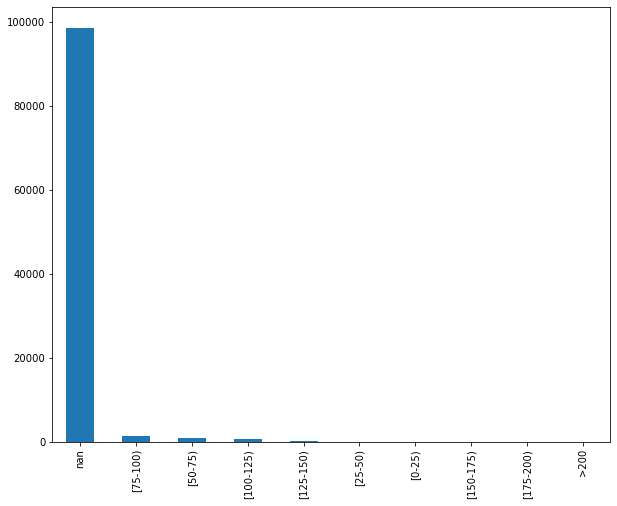

In [329]:
plt.figure(figsize=(10,8))
df['weight'].value_counts(dropna = False).plot(kind = 'bar')

#### Majority of the weight selection have missing values, the reason being that in the early 2000's weight was not considered as a mandatory feature to be recorded. So weight is dropped from our dataset

In [330]:
df = df.drop(['weight'],axis =1)

## Admission Type Id

<AxesSubplot:ylabel='admission_type_id'>

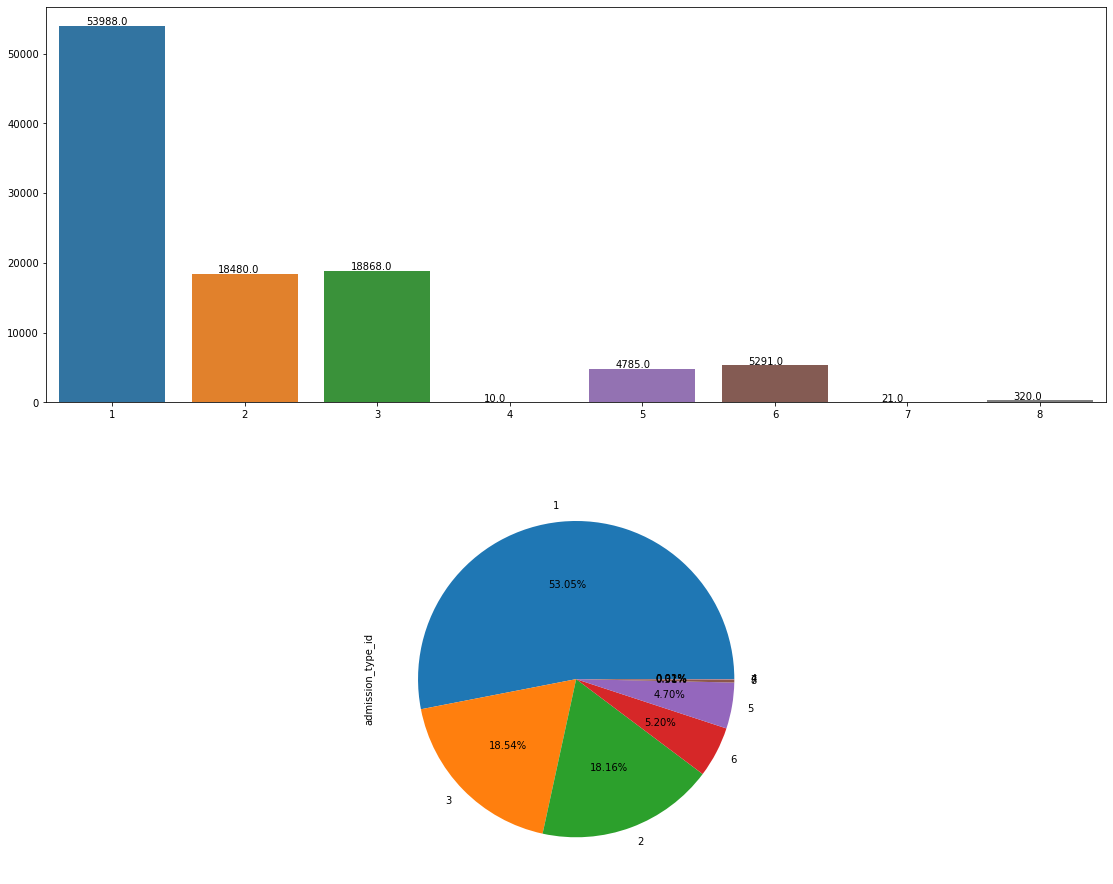

In [331]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['admission_type_id'].value_counts().index, y=df['admission_type_id'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['admission_type_id'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Admission_Type_Id: From the description, we can notice that Emergency, Urgent and Trauma Centre all mean the same i.e. emergency. So we will combine them all into one variable i.e. emergency (1).
#### Similarly, null, not_available and not_map all mean the same thing, so we will replace them into one variable i.e. not available (5)

In [332]:
df['admission_type_id'] = df['admission_type_id'].replace({2:1, 7:1, 6:5, 8:5})

<AxesSubplot:ylabel='admission_type_id'>

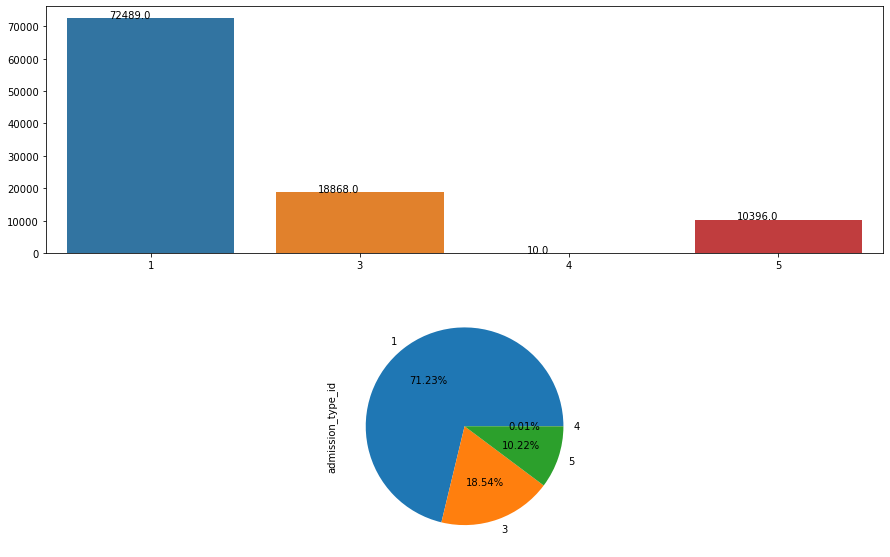

In [333]:
fig,ax = plt.subplots(2,1, figsize = (15,10))
plot = sns.barplot(data=df, x=df['admission_type_id'].value_counts().index, y=df['admission_type_id'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['admission_type_id'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Around 71% of the patients being admitted to the hospital are of emergency, urgent or trauma, followed by elective etc. Which indicates that the chances of readmission for the same will be the highest bin urgent/emergency/trauma patients

## Discharge Disposition id - Integer identifier corresponding to 26 different categories, however

<AxesSubplot:ylabel='discharge_disposition_id'>

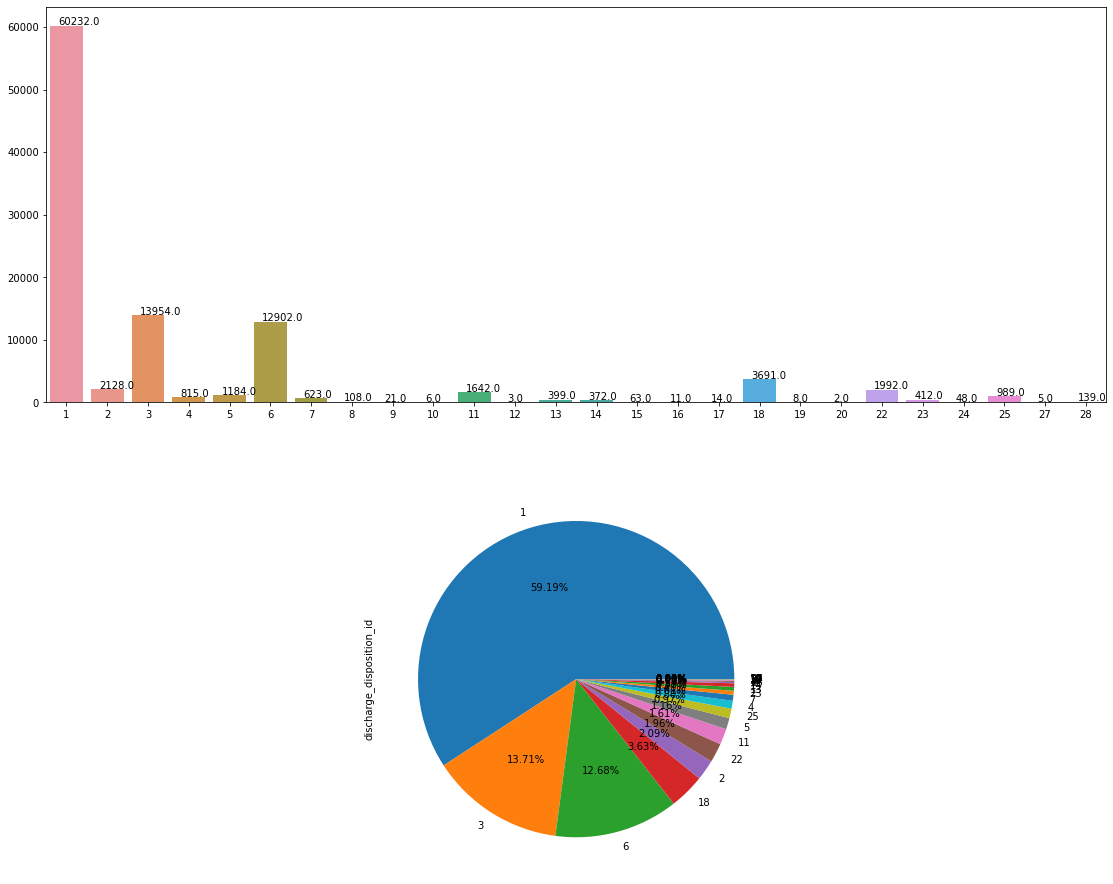

In [334]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['discharge_disposition_id'].value_counts().index, y=df['discharge_disposition_id'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['discharge_disposition_id'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

##### Many of them represent the same. So we will accordingly map them and try reduce the number of categorical features
#### Home has following integers representing them, so we will accordingly map them to one another (1,6,8,13)
#### Hospital has following integers representing them, so we will map them accordingly to one (2,3,4,5,14,22,23,24)
#### Others like neonate, still_patient, discharged to medicare, discharged to another institute, discharged to this institute can be map to on e(10,12,15,16,17)
#### Null, notmapped, unknown wiill be mapped to one (18,25,26)
#### As there are no chances of readmission for them (initially we will  map them to one category and then drop them (11, 19,20,21)) represent expired, so we replace all with 11 and then drop.   Variables like 13 and 14 related to hospice (care for people who are dying)

In [335]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({6:1,
                                                                         8:1,
                                                                         13:1,
                                                                         9:1,
                                                                         3:2,
                                                                         4:2,
                                                                         5:2,
                                                                         14:2,
                                                                         22:2,
                                                                         23:2,
                                                                         24:2,
                                                                         27:2,
                                                                         28:2,
                                                                         12:10,
                                                                         15:10,
                                                                         16:10,
                                                                         17:10,
                                                                         25:18,
                                                                         26:18,
                                                                         13:11,
                                                                         14:11,
                                                                         19:11,
                                                                         20:11,
                                                                         21:11
                                                                        })

In [336]:
i = df[(df['discharge_disposition_id']==11)].index

df = df.drop(i)

<AxesSubplot:ylabel='discharge_disposition_id'>

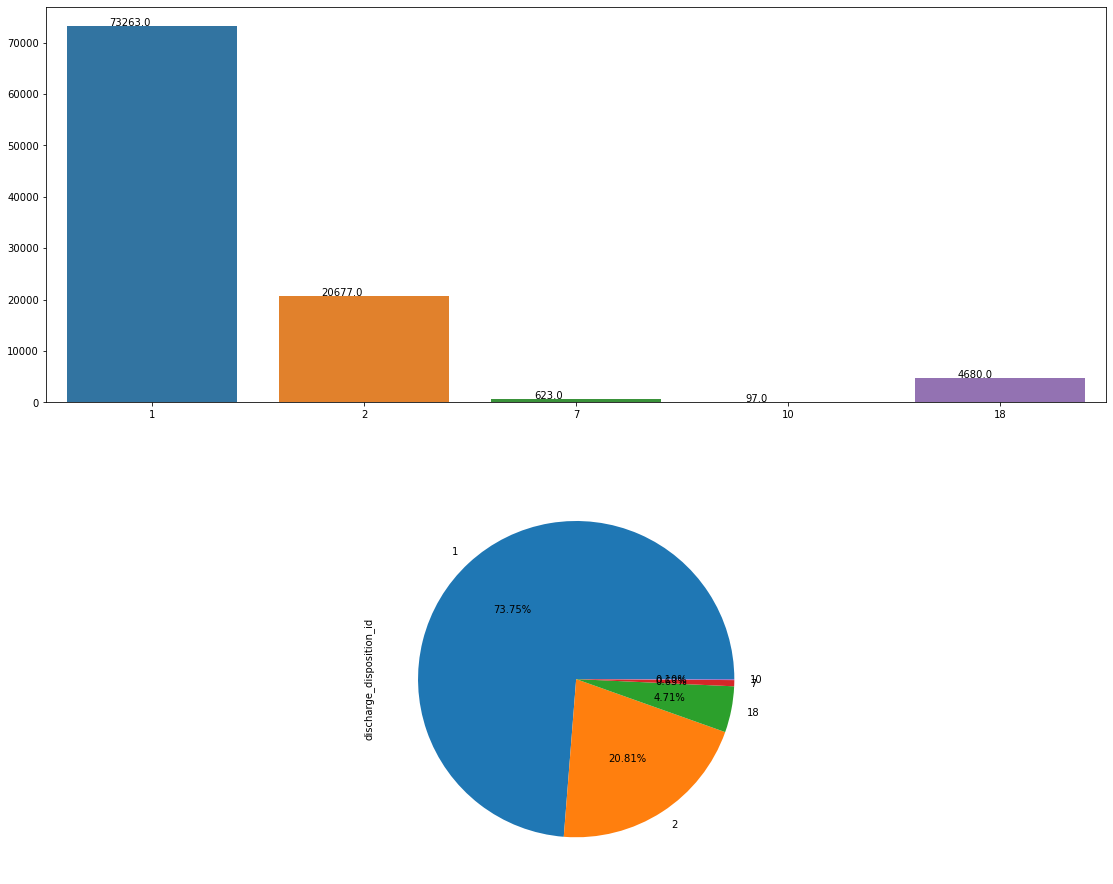

In [337]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['discharge_disposition_id'].value_counts().index, y=df['discharge_disposition_id'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['discharge_disposition_id'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### From the plots we can see that patients who where discharged to home constitute the major problem of readmission followed by discharged to skilled nursing or other facilities.

## Admission_source_id

<AxesSubplot:ylabel='admission_source_id'>

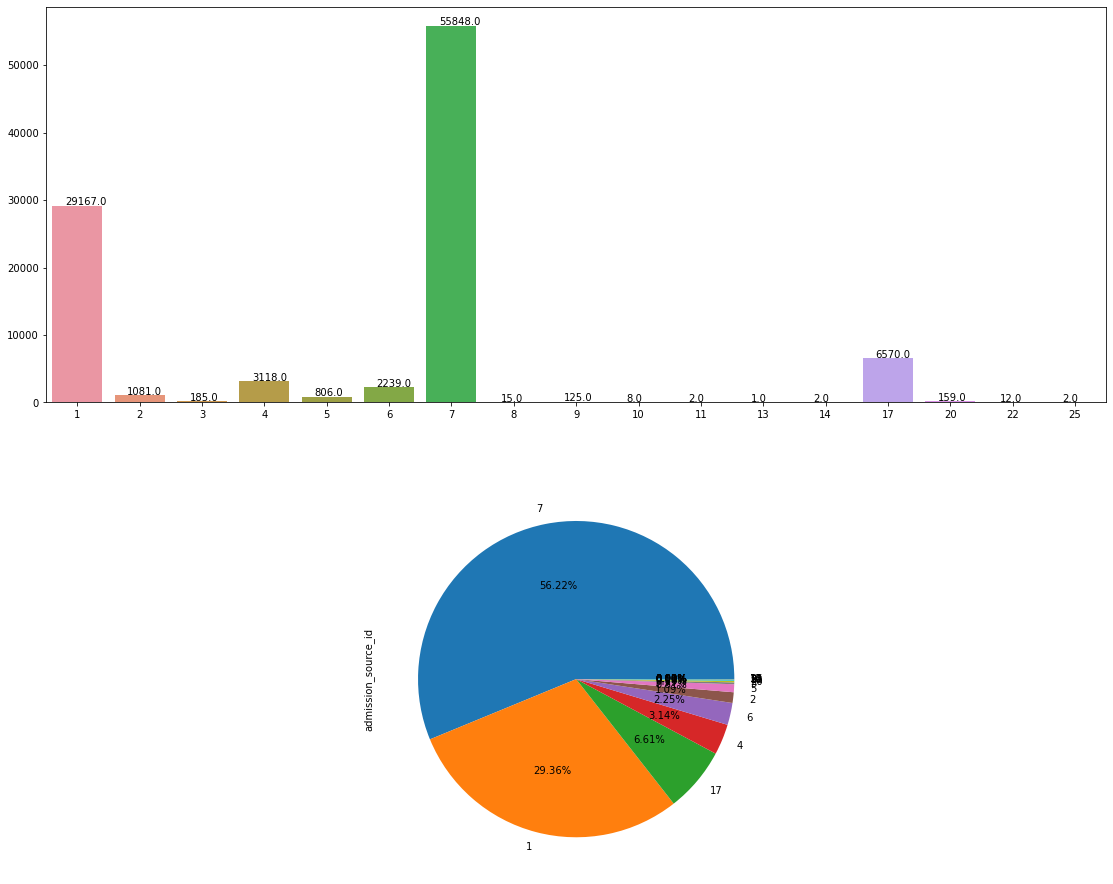

In [338]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['admission_source_id'].value_counts().index, y=df['admission_source_id'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['admission_source_id'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### As can be guessed majority of the source id is reflected towards emergency.

##### Admission_Source_Id - Integer identifier corresponding to 17 different categories, however many of them represent the same. So we will accordingly map them and try reduce the number of categorical features
#### Referral has following integers representing them, so we will accordingly map them to one another (1,2,3)
#### tranafer has following integers representing them, so we will map them accordingly to one (4,5,6,10,22,25)
#### Null, notmapped, unknown wiill be mapped to one (9,17,20)
#### map premature delivert, sick_baby and extramural birth to one (11,13,14)

In [339]:
df['admission_source_id'] = df['admission_source_id'].replace({2:1,
                                                               3:1,
                                                               5:4,
                                                               6:4,
                                                               10:4,
                                                               22:4,
                                                               25:4,
                                                               17:9,
                                                               20:9,
                                                               13:11,
                                                               14:11})

<AxesSubplot:ylabel='admission_source_id'>

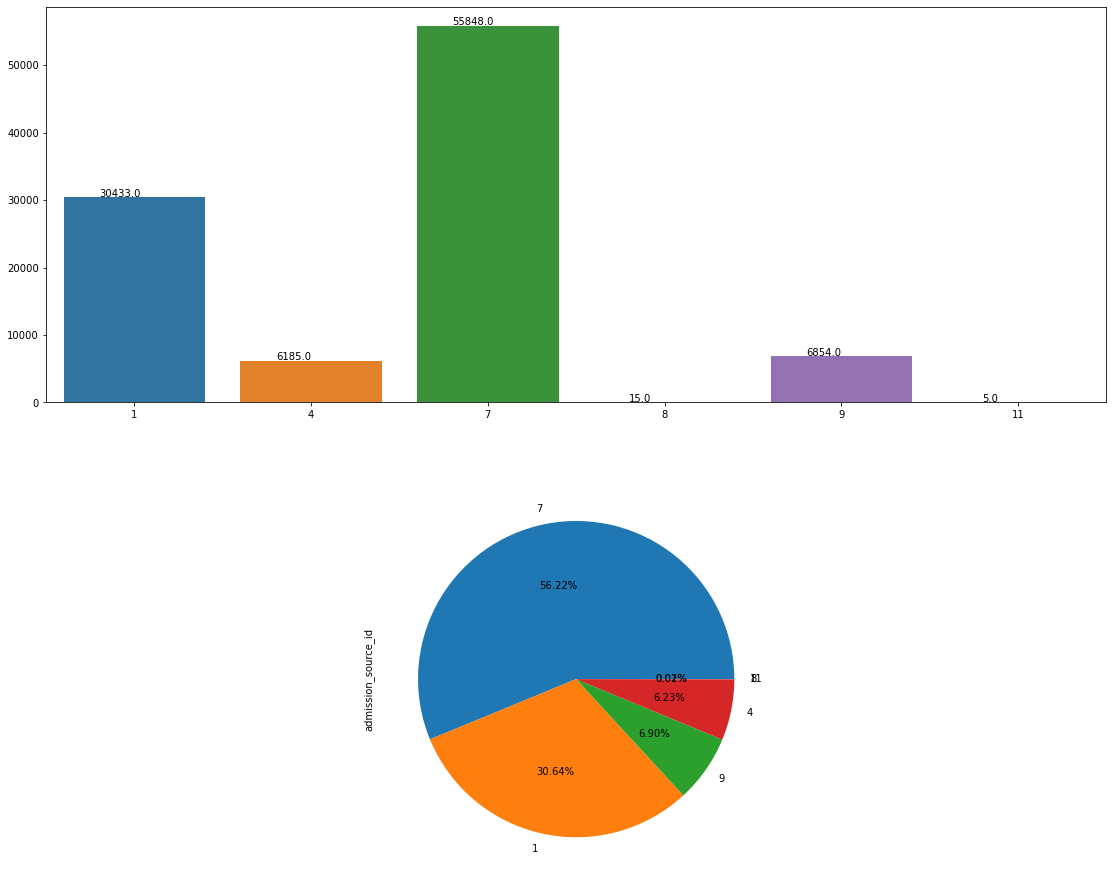

In [340]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['admission_source_id'].value_counts().index, y=df['admission_source_id'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['admission_source_id'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

## Time in hospital

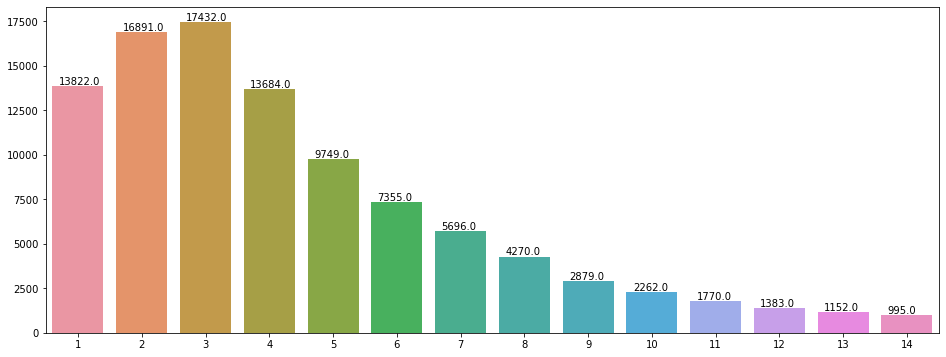

In [341]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=df, x=df['time_in_hospital'].value_counts().index, y = df['time_in_hospital'].value_counts().values)
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/8, p.get_height()+100))

#### As can be seen, most of the patients are being discharged from the hospital within 4 days (Possible reason that the readmission might be high for these patients). 

## Num_Lab_Procedures

<AxesSubplot:xlabel='num_lab_procedures'>

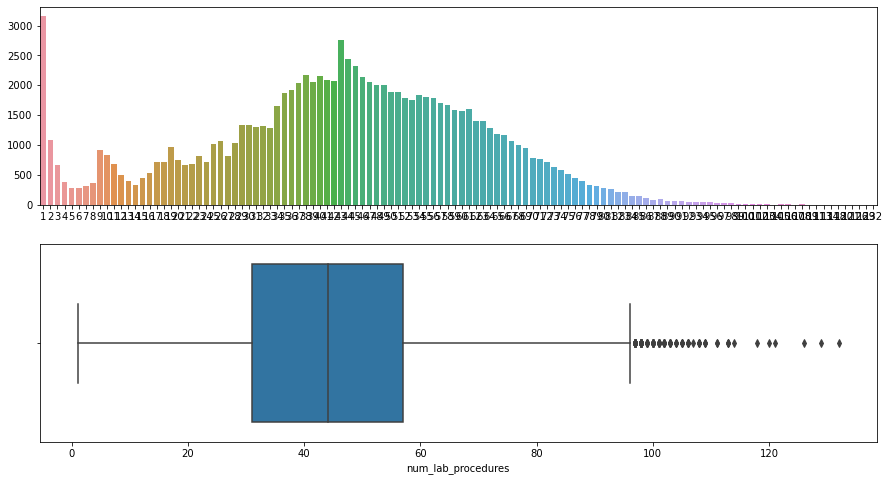

In [342]:
fig,ax = plt.subplots(2,1, figsize = (15,8))
sns.barplot(data=df, x=df['num_lab_procedures'].value_counts().index, y=df['num_lab_procedures'].value_counts().values, ax = ax[0])
sns.boxplot(data = df, x = df['num_lab_procedures'])

#### For majority of the patients the num of lab test conducted where between 30 and 60. Which indicate that most of the patients who were being admitted to the hospitals were serious. There are few outliers as well, wherein the num_of_lab procedures conducted on the patients exceeds more than 100

## Num_Procedures

<AxesSubplot:xlabel='num_procedures'>

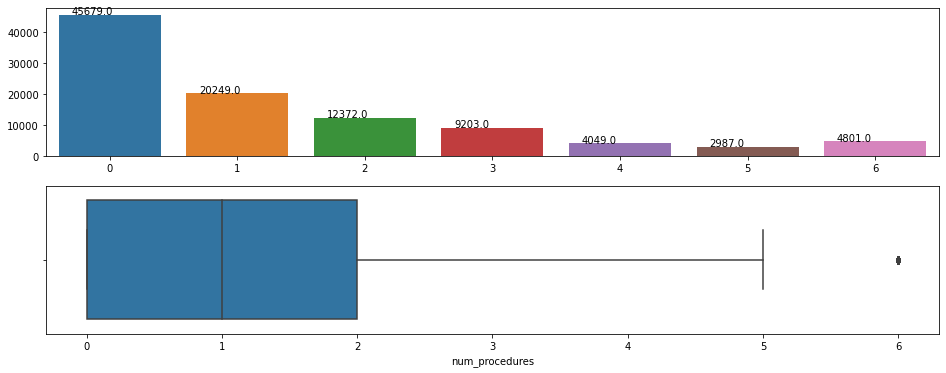

In [343]:
fig,ax = plt.subplots(2,1, figsize = (16,6))
plot = sns.barplot(data=df, x=df['num_procedures'].value_counts().index, y=df['num_procedures'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/8, p.get_height()+100))
sns.boxplot(data = df, x = df['num_procedures'])

#### For close to 50% of the patients no lab procedures(apart from lab test) were conducted. A possible reason for readmission. Further analyziz needs to be done to understand its impact

## Num_medications

<AxesSubplot:xlabel='num_medications'>

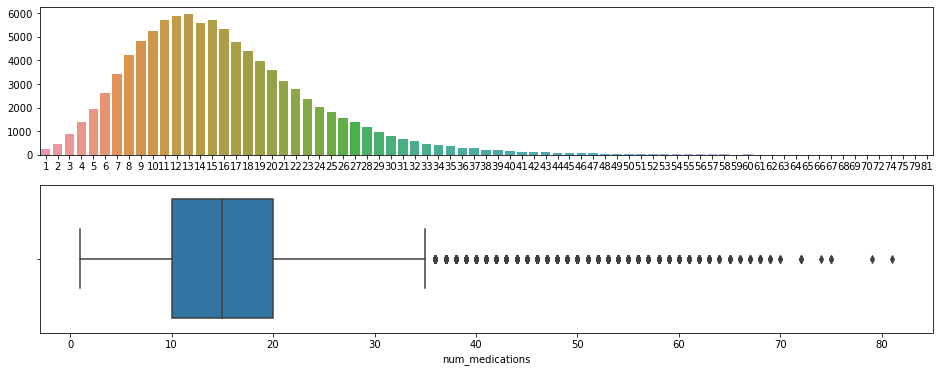

In [344]:
fig,ax = plt.subplots(2,1, figsize = (16,6))
plot = sns.barplot(data=df, x=df['num_medications'].value_counts().index, y=df['num_medications'].value_counts().values, ax = ax[0])
sns.boxplot(data = df, x = df['num_medications'])

#### most of the patients were administered 10 to 20 medications on daily basis. The distribution is reght skewed meaning, which indicates that there were few patients mostly severe whose daily intake of medications were very high

## Number_Emergency

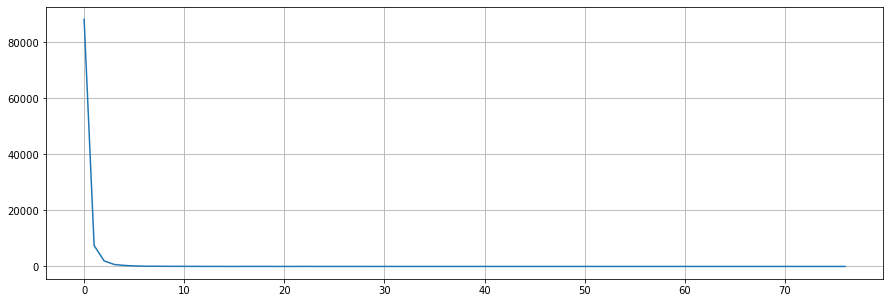

In [345]:
plt.figure(figsize=(15,5))
df['number_emergency'].value_counts().sort_index().plot.line()
plt.grid()

#### From the line plot, we can infer that there were zero emergency visits for most of the patients.

## Number Inpatient

In [346]:
plt.figure(figsize=(15,5))
df['number_inpatient'].value_counts().sort_index().plot.line()
plt.grid()

#### From the line plot, we can infer that there were quite few visits for inpatient patients. 

## Number_Outpatient

In [347]:
plt.figure(figsize=(15,5))
df['number_outpatient'].value_counts().sort_index().plot.line()
plt.grid()

#### Likewise for outpatient, there were quite few visits made for the outpatients patients

### Hospital_utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called Hospital_utilization. The idea was to see which version gives us better results.


In [348]:
df['Hospital_Utilization'] = df['number_emergency']+df['number_outpatient']+df['number_inpatient']

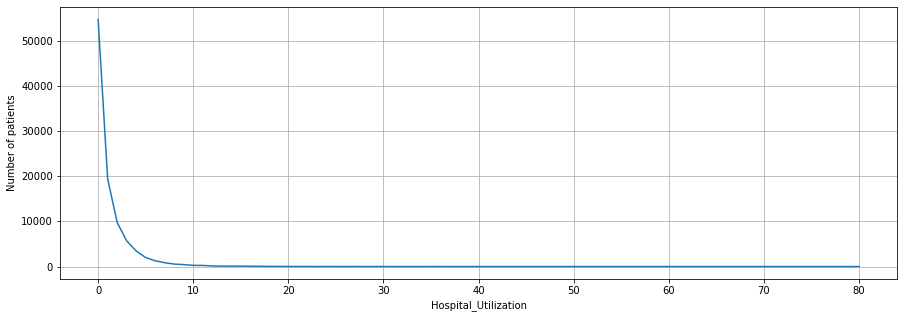

In [349]:
plt.figure(figsize=(15,5))
df['Hospital_Utilization'].value_counts().sort_index().plot(kind = 'line')
plt.xlabel('Hospital_Utilization')
plt.ylabel('Number of patients')
plt.grid()
plt.show()

## Diag_1, Diag_2 and Diag_3

#### Dropping the rows where all the values of diag_1, diag_2 and diag_3 are zero

In [350]:
i = set(df[(df['diag_1']==np.nan) & (df['diag_2']==np.nan) & (df['diag_3']==np.nan)].index)
df = df.drop(i)

#### Filling the missing values with mode of the values

In [351]:
df['diag_1'] = df['diag_1'].replace(np.nan, df['diag_1'].mode()[0])
df['diag_2'] = df['diag_2'].replace(np.nan, df['diag_2'].mode()[0])
df['diag_3'] = df['diag_3'].replace(np.nan, df['diag_3'].mode()[0])

#### The primary, secondary and tertiary diagnoses for a patient record are 700–900 unique ICD codes. If we try to include all of them in our model, it will be very difficult to interpret our model meaningfully. If we look at the original research paper accompanied with this data set, we note that the diagnosis codes have been collapsed into 10 disease categories. We will also take this approach to categorize these three features.(https://apps.who.int/iris/handle/10665/40492)

##### 1. Disease of circulatory system (symptom 785) = range (390 - 459)

#### 2. Disease of respiratory system (symptom 786) = range (460 - 519)

#### 3. Disease of digestive system (symptom 787) = range(520 - 579)

#### 4. Diseases of the genitourinary system (sympton 788) = range (580 - 629)

#### 5. Diabetes Mellitus - 250.aa (aa represents the decimal points of diabetes)

#### 6. Injury and poisning = 800 - 999

#### 7. Diseases related to musculoskeletal system and connective tissue = 710 - 739

#### 8. Neoplasms = 140 - 239; Complications of pregnancy, childbirth and the puerperium = 630 - 679

#### 0 Other - for integers apart from the above

In [352]:
df['diag_1'] = df['diag_1'].apply(lambda x : '0' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('1' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('2' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('3'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('4'    if int(float(x)) == 250
                                        else     ('5'      if int(float(x)) in range(800, 1000)
                                        else ('6' if int(float(x)) in range(710, 740)
                                        else ('7'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('8'       if int(float(x)) in range(140, 240)
                                        else ('8'        if int(float(x)) in range(630, 680)
                                        else '0'))))))))))

df['diag_2'] = df['diag_2'].apply(lambda x : '0' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('1' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('2' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('3'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('4'    if int(float(x)) == 250
                                        else     ('5'      if int(float(x)) in range(800, 1000)
                                        else ('6' if int(float(x)) in range(710, 740)
                                        else ('7'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('8'       if int(float(x)) in range(140, 240)
                                        else ('8'        if int(float(x)) in range(630, 680)
                                        else '0'))))))))))

df['diag_3'] = df['diag_3'].apply(lambda x : '0' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('1' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('2' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('3'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('4'    if int(float(x)) == 250
                                        else     ('5'      if int(float(x)) in range(800, 1000)
                                        else ('6' if int(float(x)) in range(710, 740)
                                        else ('7'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('8'       if int(float(x)) in range(140, 240)
                                        else ('8'        if int(float(x)) in range(630, 680)
                                        else '0'))))))))))

<AxesSubplot:ylabel='diag_1'>

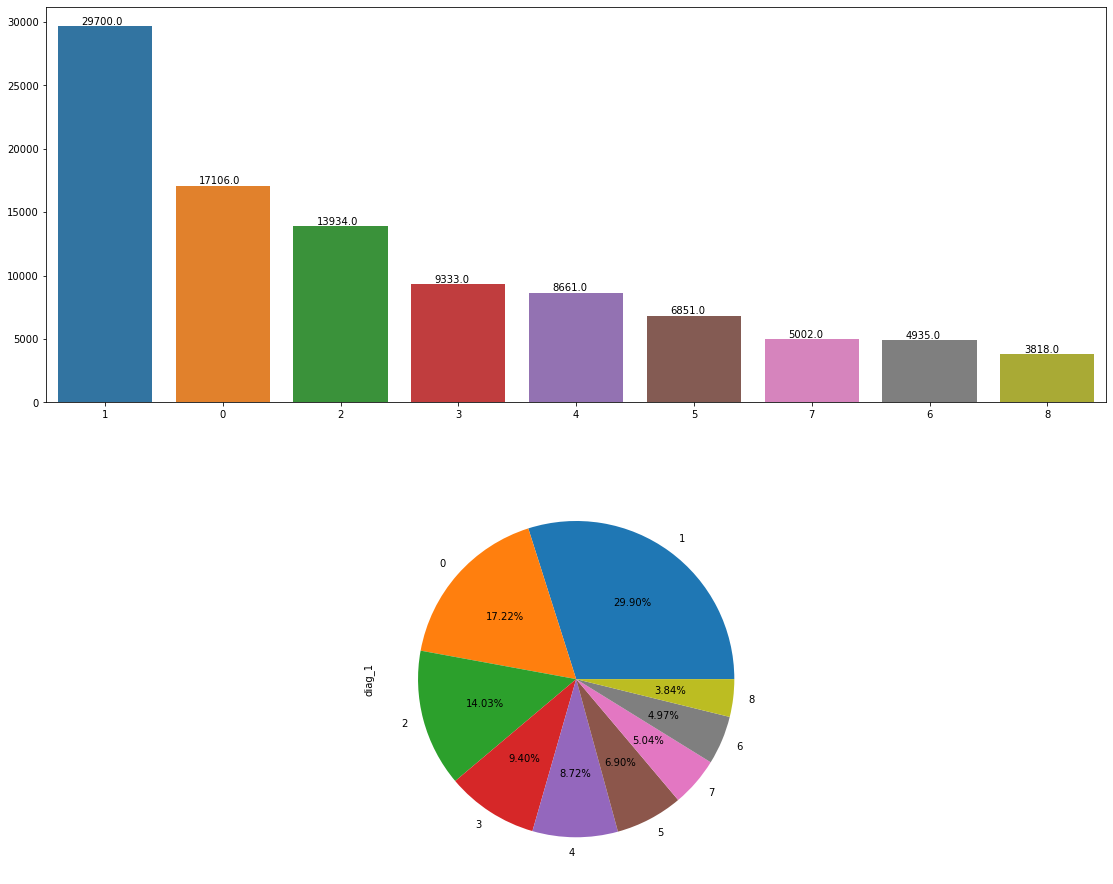

In [353]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['diag_1'].value_counts().index, y=df['diag_1'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['diag_1'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Majority of the patients are being diagnosed with circulatory disease followed by other, respiratory etc. These conditions along with diabetes has adversee affect on the people. Chances of mortality among them is high compared to people suffering from the same disease without diabetes

<AxesSubplot:ylabel='diag_2'>

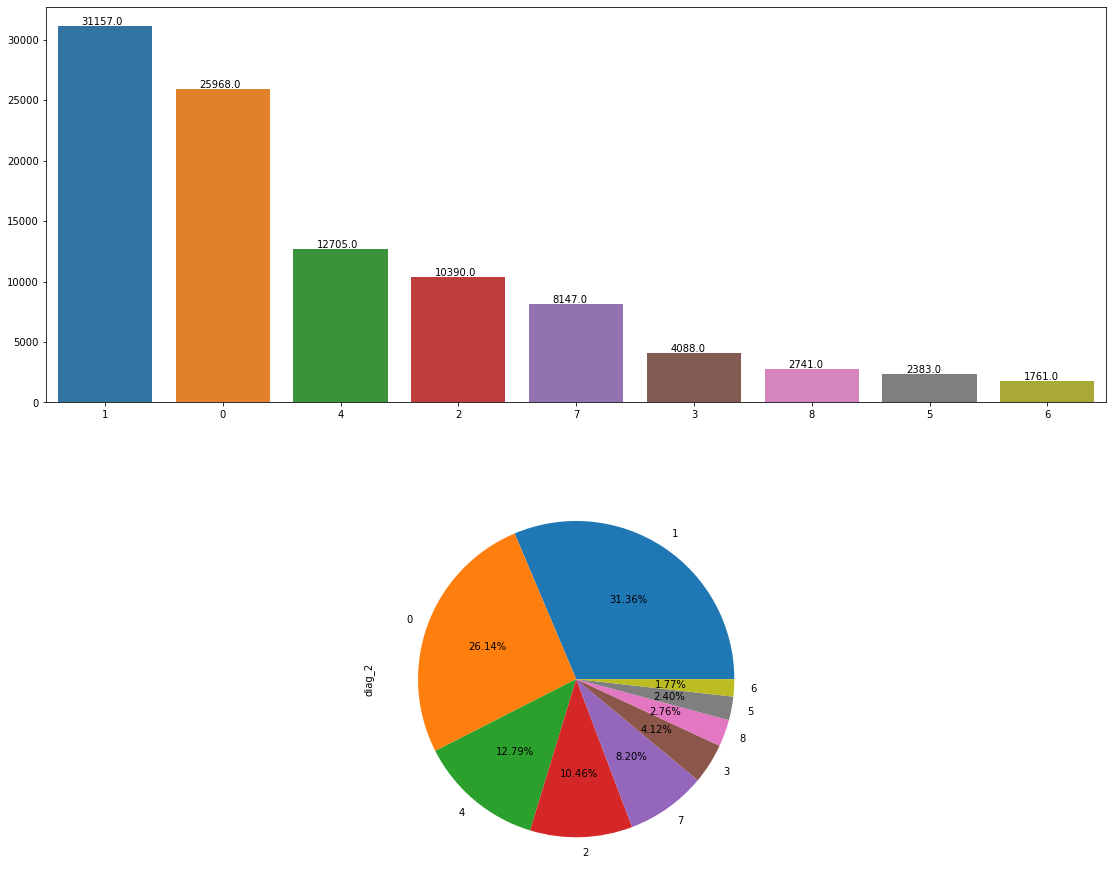

In [354]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['diag_2'].value_counts().index, y=df['diag_2'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['diag_2'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

<AxesSubplot:ylabel='diag_3'>

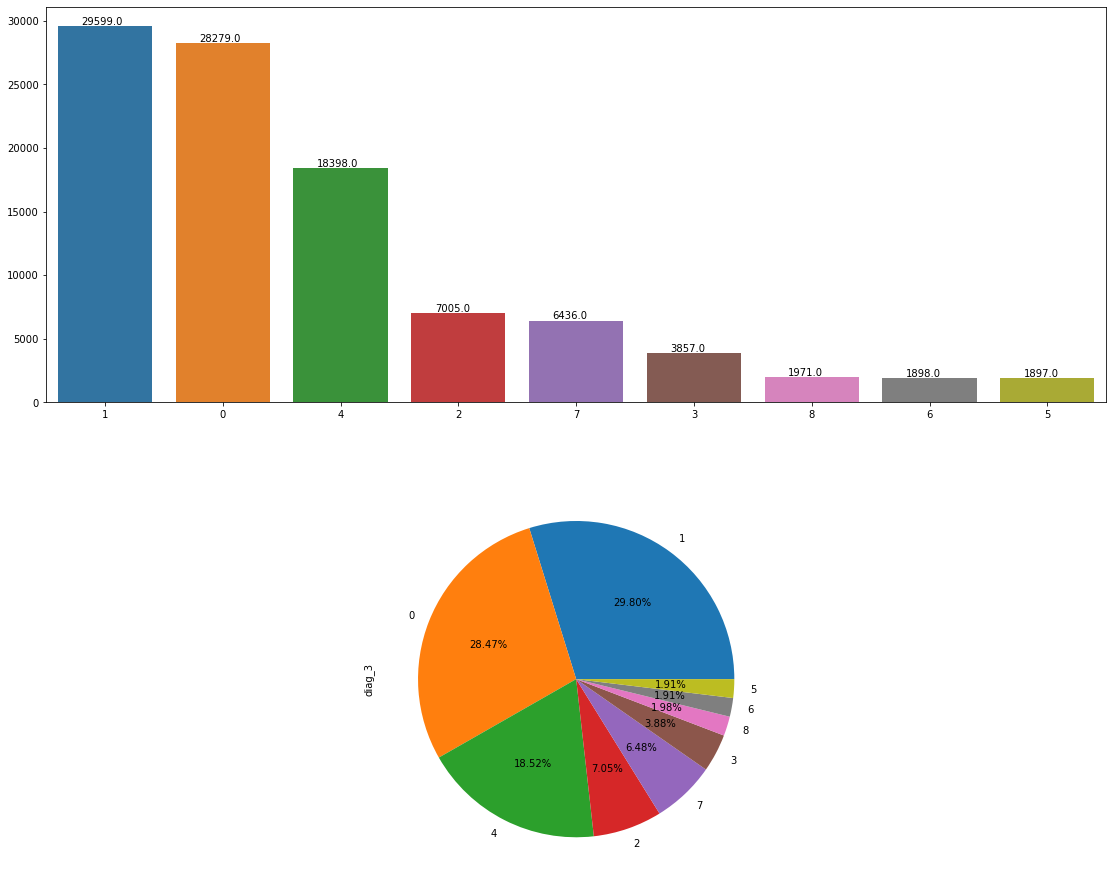

In [355]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['diag_3'].value_counts().index, y=df['diag_3'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['diag_3'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Majority of the patients are being diagnosed with circulatory disease followed by other, respiratory etc. These conditions along with diabetes has adversee affect on the people. Chances of mortality among them is high compared to people suffering from the same disease without diabetes

## Max_glu_serum

<AxesSubplot:ylabel='max_glu_serum'>

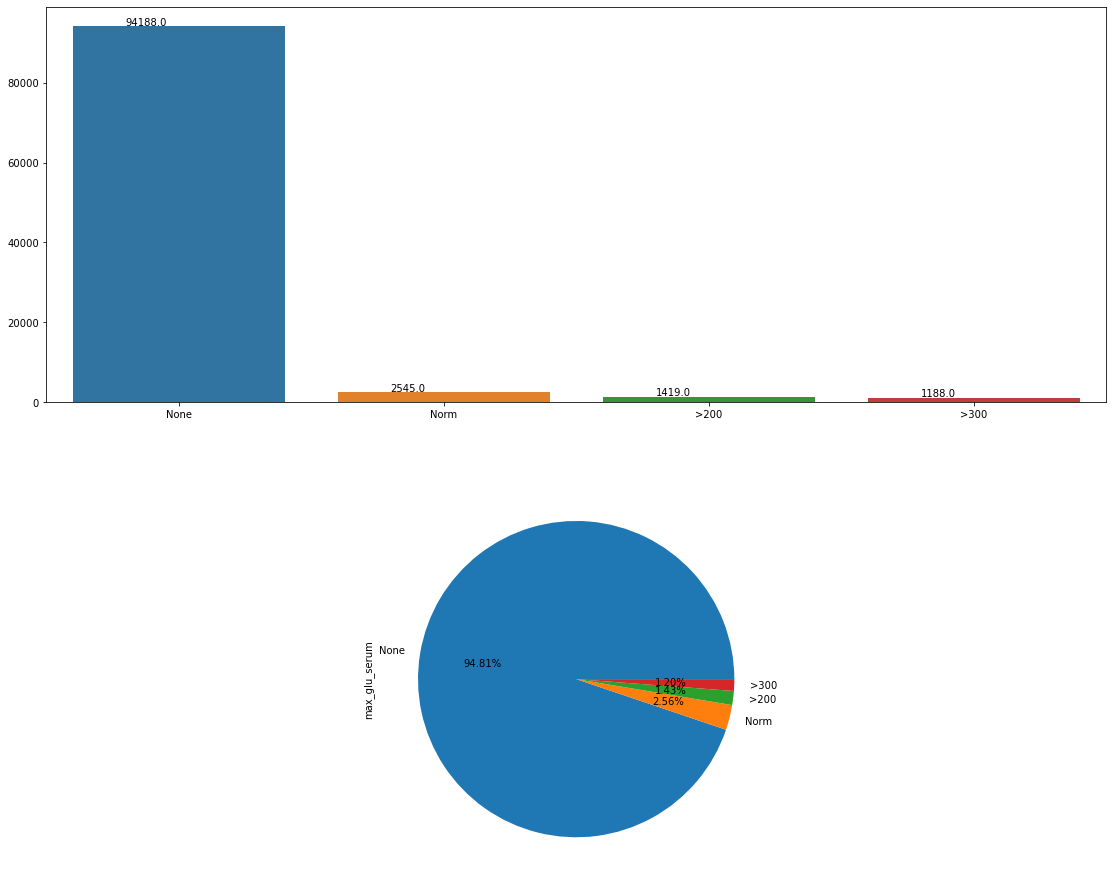

In [356]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['max_glu_serum'].value_counts().index, y=df['max_glu_serum'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['max_glu_serum'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### One of the most important indicator for diabetes is glucose, Majority of the data is None meaning that the test is not done and anything above 200 is a good indicator of diabetes patients. Since this is a ordinal data, we will accordingly replace them with values like wise

In [357]:
df['max_glu_serum'].value_counts()

None    94188
Norm     2545
>200     1419
>300     1188
Name: max_glu_serum, dtype: int64

In [358]:
df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x: 0 if x=='None' 
                                                else (1 if x=='Norm'
                                                else (2 if x=='>200'
                                                else 3)))

## A1Cresult

<AxesSubplot:ylabel='A1Cresult'>

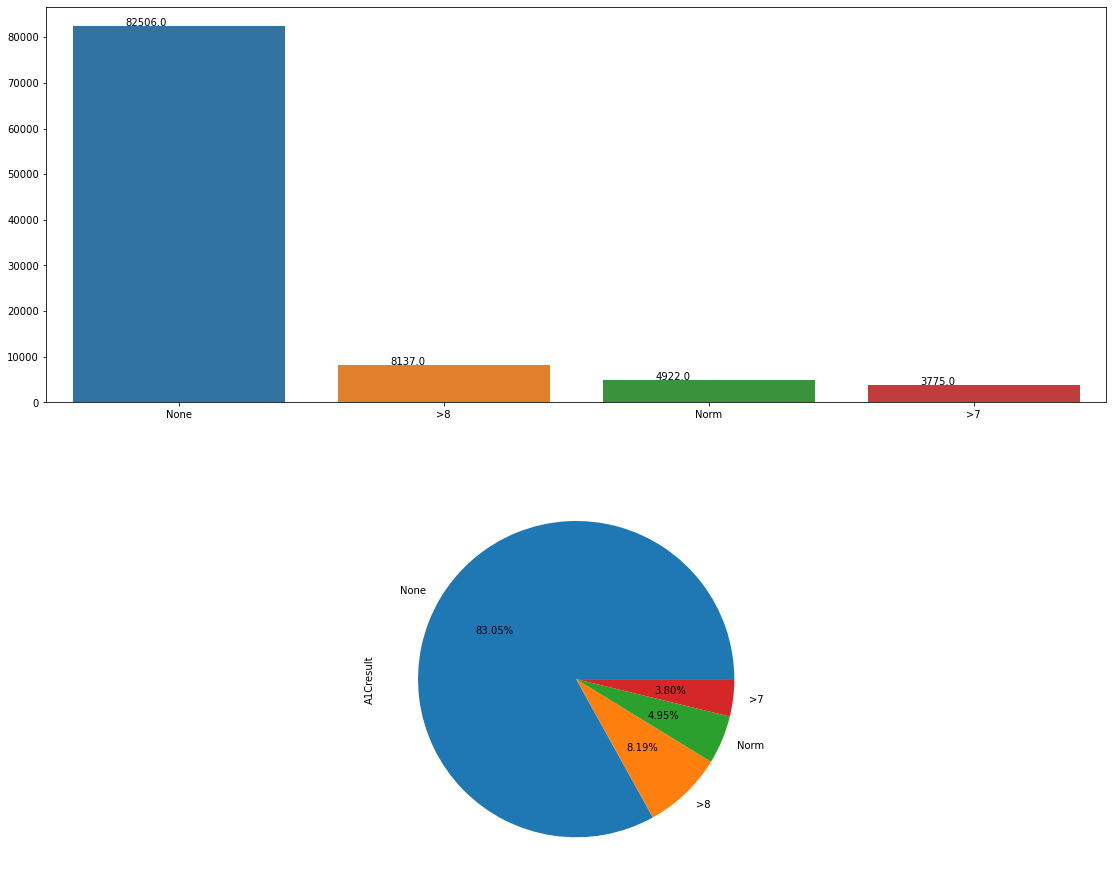

In [359]:
fig,ax = plt.subplots(2,1, figsize = (19,16))
plot = sns.barplot(data=df, x=df['A1Cresult'].value_counts().index, y=df['A1Cresult'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['A1Cresult'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Similar to max_glu_serum, A1Cresult is also one of the most important factor in determining diabetes. Anything above 5.7% is considered a good indicator for diabetes. However, we can see that majority of the data is None, meaning that the tests were not conducted for these patients

In [360]:
df['A1Cresult'].value_counts()

None    82506
>8       8137
Norm     4922
>7       3775
Name: A1Cresult, dtype: int64

In [361]:
df['A1Cresult'] = df['A1Cresult'].apply(lambda x: 0 if x=='None' 
                                                else (1 if x=='Norm'
                                                else (2 if x=='>7'
                                                else 3)))

## Number_diagnoses

<AxesSubplot:>

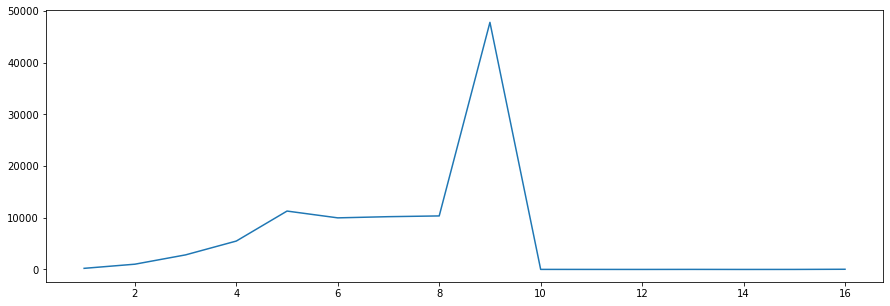

In [362]:
plt.figure(figsize=(15,5))
df['number_diagnoses'].value_counts().sort_index().plot.line()

#### From the line plot we can see that for most of the patients are 8 to 10 diagosis entered their body

## Medications

In [363]:
def multi_plot(features,df):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize = (20,20) )
    index = 0
    for i in range(3):
        for j in range(3):
            sns.countplot(x=features[index], hue="readmitted", data=df, ax=axs[i,j],palette="rocket")
            index += 1
l1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide']
l2 = ['miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone']
l3 = ['metformin-rosiglitazone','metformin-pioglitazone' , 'pioglitazone', 'rosiglitazone', 'acarbose']



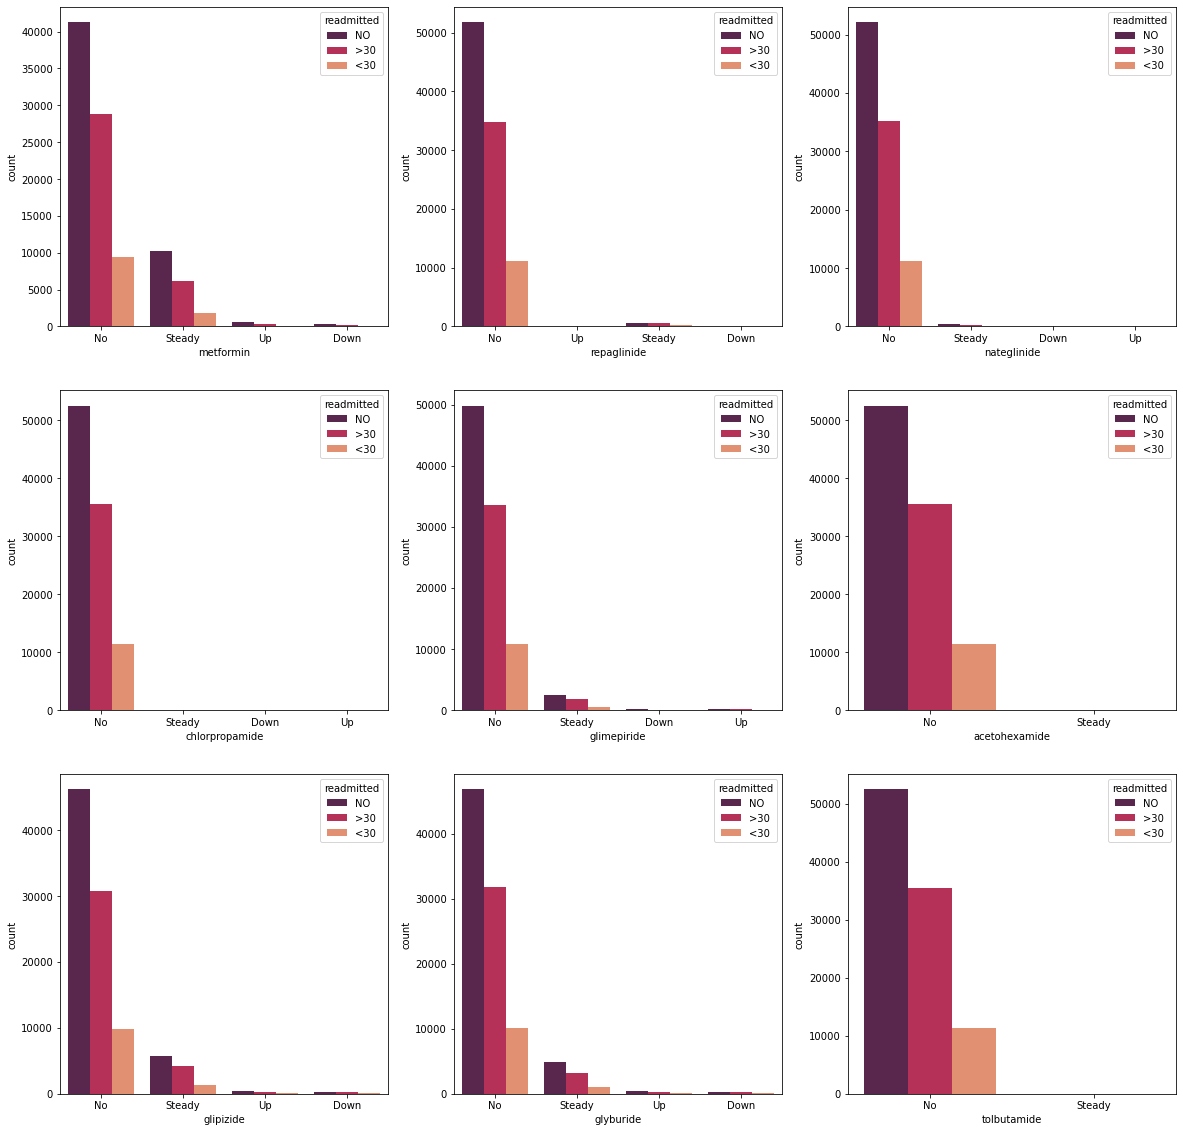

In [364]:
multi_plot(l1,df)

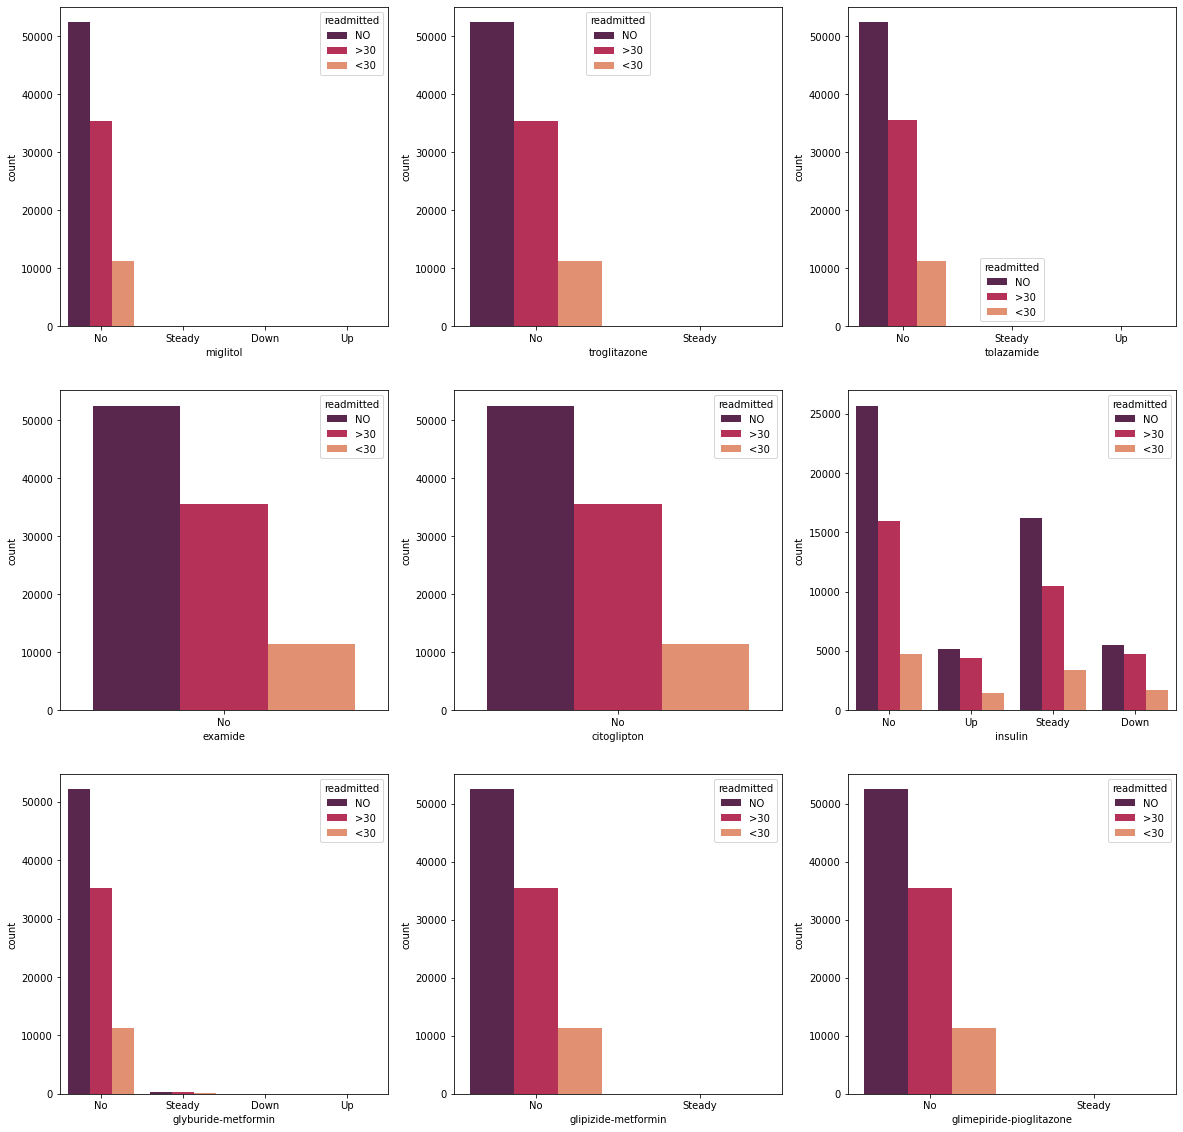

In [365]:
multi_plot(l2,df)

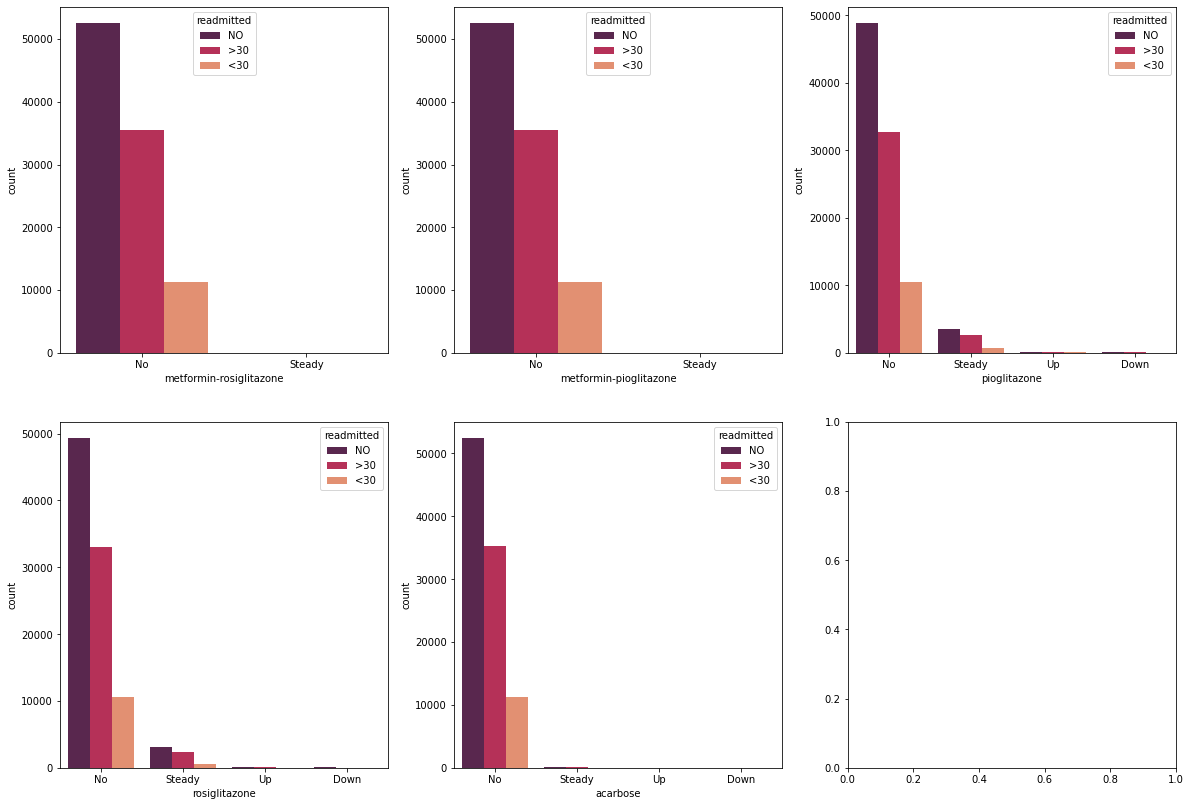

In [366]:
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize = (20,14) )
index = 0

for i in range(2):
    for j in range(3):
        try:
            sns.countplot(x=l3[index], hue="readmitted", data=df, ax=axs[i,j],palette="rocket")
            index += 1
        except IndexError:
            print('')
           
        

**Observations:**
* Medicines which were not prescribed to any patients: *metformin-pioglitazone, metformin-rosiglitazone, glimepiride-pioglitazone, glipizide-metformin, examide, citoglipton, acetohexamide, tolbutamide*
* we can see from here that all the medicines have most of the encounters where they were not prescribed to patients.
* Then the 2nd most frequent status of medicine  is 'Steady'.

In [367]:
def plot_med_stat(status):
    l = l1 + l2 + l3
    
    dic = {}
    explode = []
    for med in l:
        if len(df[df[med]==status]) > 100:
            dic[med] = len(df[df[med]==status])
            explode.append(0.2)
    print(pd.DataFrame.from_dict(dic,orient='index',columns=['total']).sort_values(by=['total']))

    plt.figure(figsize =(10,10))
    plt.pie(dic.values(),labels=dic.keys(),explode = explode, shadow=True, rotatelabels=True,autopct='%1.1f%%')
    plt.legend(title="Medicine names",loc="best",bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()


               total
repaglinide      107
rosiglitazone    171
pioglitazone     230
glimepiride      322
glipizide        764
glyburide        801
metformin       1063
insulin        10987


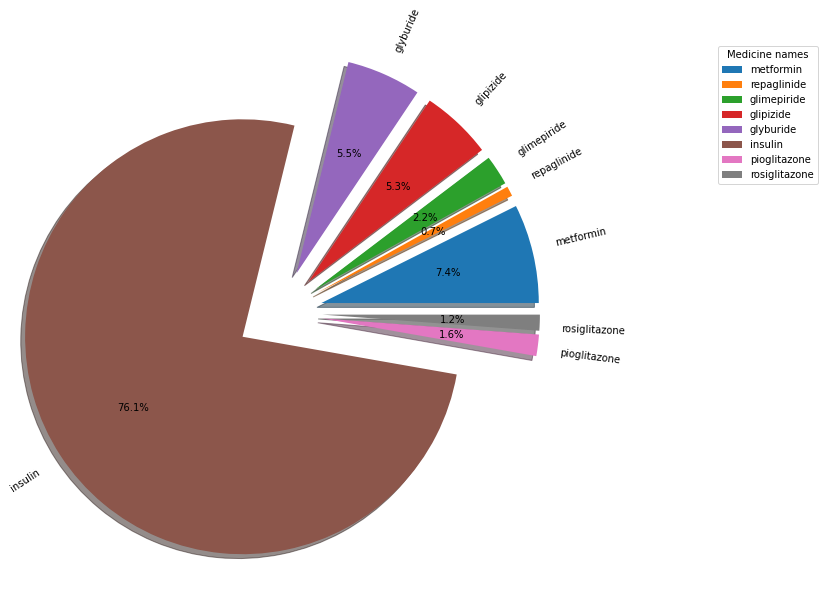

In [368]:
plot_med_stat('Up')

**This plot only considers medicine with at least 100 cases of upgradation. Clearly, of all the encounters where dosage were increased, Inuslin has the majority of the cases (76.1%), followed by Metformin. There are many medicines whose dosage were not increased, not even in a single case.** 

              total
pioglitazone    117
glimepiride     191
glipizide       548
glyburide       560
metformin       574
insulin       11908


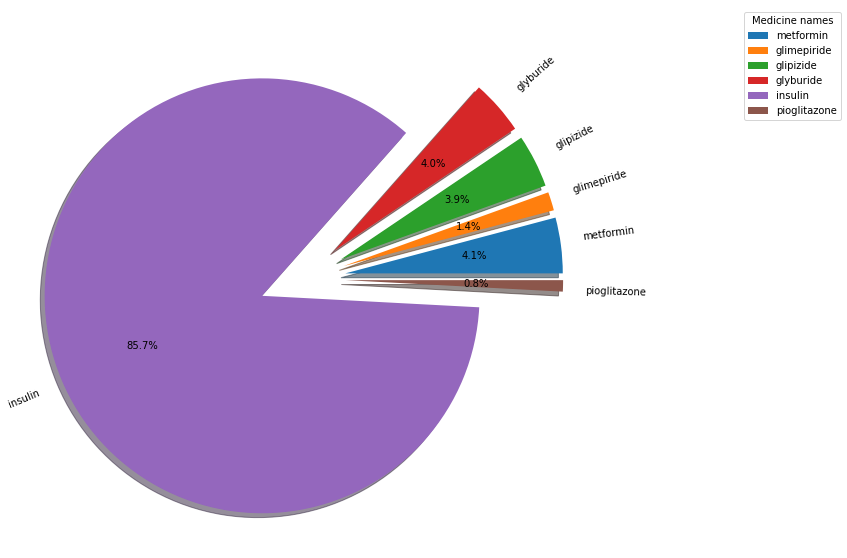

In [369]:
plot_med_stat('Down')

**This plot only considers medicine with at least 100 cases of dosage reduction. Of all the encounters where dosage were reduced, Inuslin has the majority of the cases (85.9%), followed by Metformin, glyburide and then glipizide.**

                     total
acarbose               292
nateglinide            654
glyburide-metformin    684
repaglinide           1368
glimepiride           4609
rosiglitazone         6047
pioglitazone          6907
glyburide             9162
glipizide            11218
metformin            18206
insulin              30069


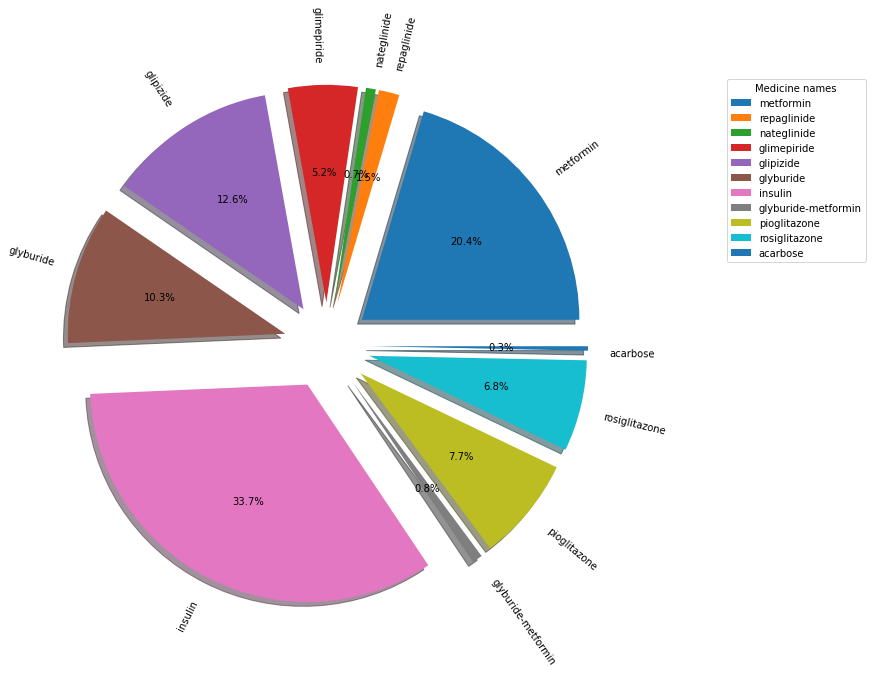

In [370]:
plot_med_stat('Steady')

**Again in cases where medicine was kept steady, insulin (34%) had the majority cases followed by metformin (20.2%), glipizide (12.5%) then glyburide (10.2%). **

                          total
insulin                   46376
metformin                 79497
glipizide                 86810
glyburide                 88817
pioglitazone              92086
rosiglitazone             93037
glimepiride               94218
repaglinide               97822
glyburide-metformin       98642
nateglinide               98651
acarbose                  99035
chlorpropamide            99255
tolazamide                99301
miglitol                  99302
tolbutamide               99319
glipizide-metformin       99327
troglitazone              99337
metformin-rosiglitazone   99338
acetohexamide             99339
glimepiride-pioglitazone  99339
metformin-pioglitazone    99339
examide                   99340
citoglipton               99340


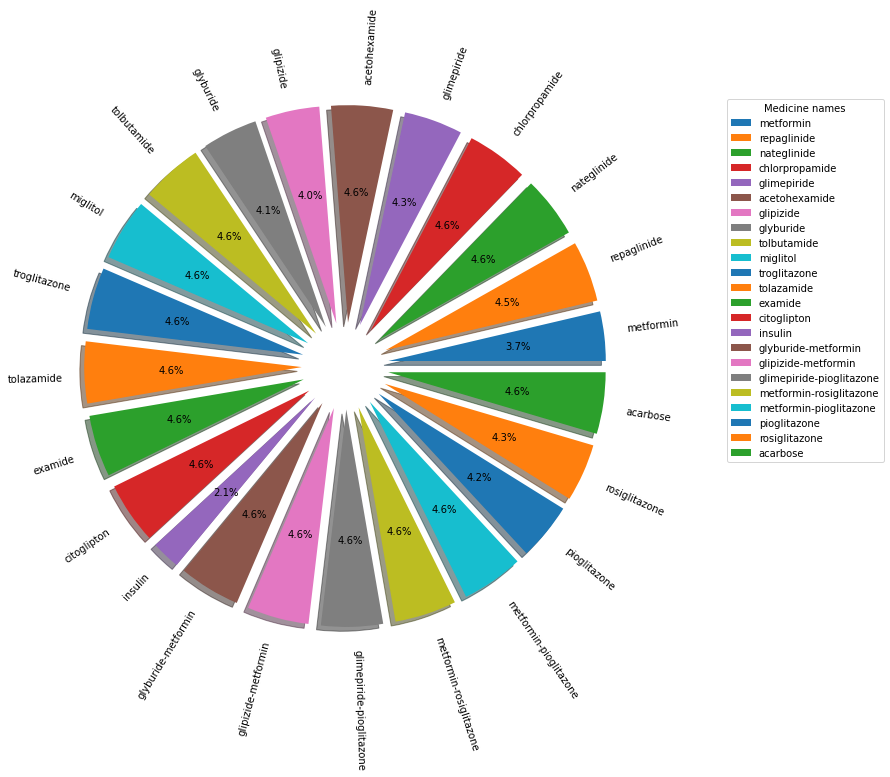

In [371]:
plot_med_stat('No')

**Almost all the medicines faced same number of cases where they were not prescribes except a few. Insulin has the lowest cases where it was not prescribed**


**By all the analysis of 23 medicine, we can say that Insulin is the most important medicine feature followed by metformin.**

In [372]:
from scipy.stats import chi2_contingency

In [373]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in cols:
    print(i)
    ct = pd.crosstab(df[i], df['readmitted'])
    stat, p, dof, expected = chi2_contingency(ct)
    print(p)
    if p<0.05:
        print('The medication', i, 'is significant')
    else:
        print('The medication', i, 'is not significant')
    
    

metformin
4.449877049031145e-30
The medication metformin is significant
repaglinide
5.952332380865479e-10
The medication repaglinide is significant
nateglinide
0.7616074375382518
The medication nateglinide is not significant
chlorpropamide
0.18540791938126422
The medication chlorpropamide is not significant
glimepiride
0.022945457285104665
The medication glimepiride is significant
acetohexamide
0.40694177653327424
The medication acetohexamide is not significant
glipizide
2.736565335852955e-07
The medication glipizide is significant
glyburide
0.03233112760252546
The medication glyburide is significant
tolbutamide
0.5576501253885651
The medication tolbutamide is not significant
pioglitazone
0.0007381159687369272
The medication pioglitazone is significant
rosiglitazone
6.5108451692614226e-06
The medication rosiglitazone is significant
acarbose
7.795125634983639e-06
The medication acarbose is significant
miglitol
0.08966613720091461
The medication miglitol is not significant
troglitazone
0

#### From our statistical test as well we can confirm that the medications that we expected to be widely significant using EDA is correct

#### Based on our research, we an see that Insulin is the most widely used medication for type 1 diabetes. While Metformin along with a combination of other medications are used for type 2 diabetes

#### Feature indicates whether the drug was prescribed or there was a change in the dosage. Here, Important is to note the “Change” in medication whether going “UP” or “Down” are more important to us in the current context.

In [374]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in cols:
    print(i)
    print(df[i].value_counts(normalize = True))

metformin
No        0.800252
Steady    0.183270
Up        0.010701
Down      0.005778
Name: metformin, dtype: float64
repaglinide
No        0.984719
Steady    0.013771
Up        0.001077
Down      0.000433
Name: repaglinide, dtype: float64
nateglinide
No        0.993064
Steady    0.006583
Up        0.000242
Down      0.000111
Name: nateglinide, dtype: float64
chlorpropamide
No        0.999144
Steady    0.000785
Up        0.000060
Down      0.000010
Name: chlorpropamide, dtype: float64
glimepiride
No        0.948440
Steady    0.046396
Up        0.003241
Down      0.001923
Name: glimepiride, dtype: float64
acetohexamide
No        0.99999
Steady    0.00001
Name: acetohexamide, dtype: float64
glipizide
No        0.873868
Steady    0.112925
Up        0.007691
Down      0.005516
Name: glipizide, dtype: float64
glyburide
No        0.894071
Steady    0.092229
Up        0.008063
Down      0.005637
Name: glyburide, dtype: float64
tolbutamide
No        0.999789
Steady    0.000211
Name: tolbutamid

#### Medications examide and citoglipton havent been used at all. So we will drop them from our dataset

In [375]:
df = df.drop(['examide','citoglipton'],axis = 1)

#### From previous research it has been shown that medication change as resulted in reduction of readmission rates, so we decided to count how many changes were made for each patient  and declated that as a new feature. The reason is that to simplify the model and possibly find/discover a relationship with number of changes regardless of which drug was changed

In [376]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in cols:
    colname = str(i)+'temp'
    df[colname] = df[i].apply(lambda x: 0 if (x=='No' or x=='Steady') else 1)
    
df['medication_change']  = 0

for i in cols:
    colname = str(i)+'temp'
    df['medication_change'] = df['medication_change']+df[colname]
    del df[colname]

In [377]:
fig,ax = plt.subplots(2,1, figsize = (19,12))
plot = sns.barplot(data=df, x=df['medication_change'].value_counts().index, y=df['medication_change'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['medication_change'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')



<AxesSubplot:ylabel='medication_change'>

#### For most patients there was no change in the medications as is evident from both bar and pie chart. 

#### The total number of medications used by a patient reflects on the severity of their condition. So, we will count the number of medications for each patient record in the form of a new feature — ‘medicatiions_used’. Steady, Up and Down feature values are coded as 1 and No as 0 for taking the count across every patient record.

In [378]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in cols:
    df[i] = df[i].replace({'No':0, 'Up':1, 'Down':1, 'Steady':1})


df['medications_used'] = 0

for i in cols:
    df['medications_used'] = df['medications_used'] + df[i]

In [379]:
df['medications_used'].value_counts()

1    46030
0    22623
2    21593
3     7707
4     1324
5       58
6        5
Name: medications_used, dtype: int64

<AxesSubplot:ylabel='medications_used'>

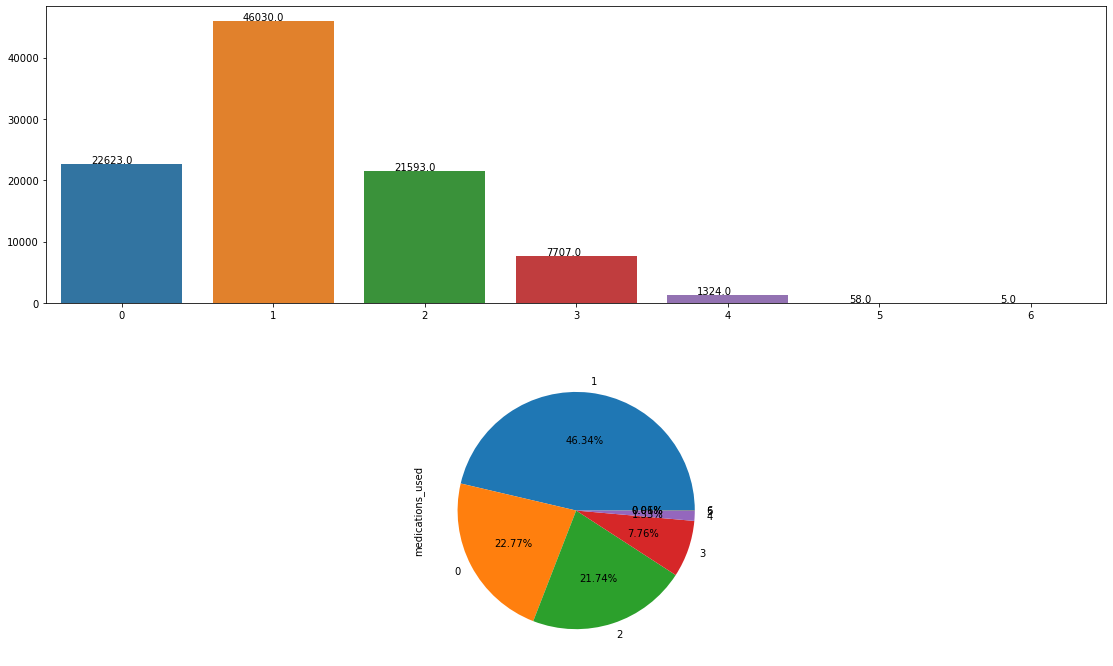

In [380]:
fig,ax = plt.subplots(2,1, figsize = (19,12))
plot = sns.barplot(data=df, x=df['medications_used'].value_counts().index, y=df['medications_used'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['medications_used'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')



## Change

<AxesSubplot:ylabel='change'>

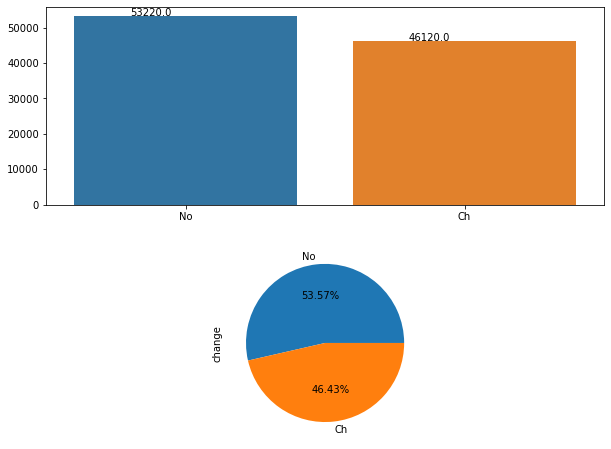

In [381]:
fig,ax = plt.subplots(2,1, figsize = (10,8))
plot = sns.barplot(data=df, x=df['change'].value_counts().index, y=df['change'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['change'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Another indicator for medication change. Seems like for around 46% of the patients there was a medication change. We will accordingly replace No with '0' and Ch with '1'.

In [382]:
df['change'] = df['change'].apply(lambda x: 1 if x=='Ch' else 0)

## DiabetesMed

<AxesSubplot:ylabel='diabetesMed'>

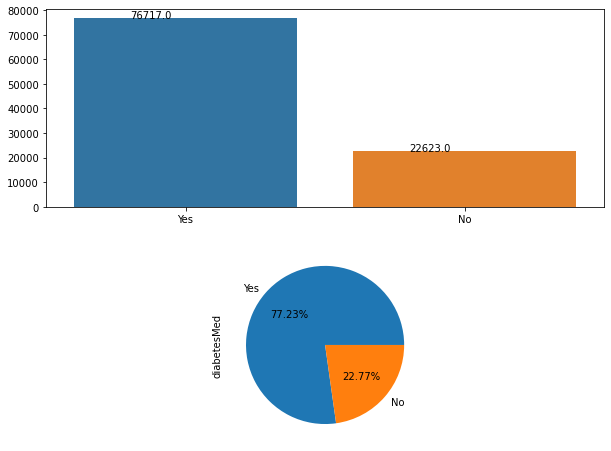

In [383]:
fig,ax = plt.subplots(2,1, figsize = (10,8))
plot = sns.barplot(data=df, x=df['diabetesMed'].value_counts().index, y=df['diabetesMed'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['diabetesMed'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### It seems like almost 77% of the people were taking medications

In [384]:
df['diabetesMed'] = df['diabetesMed'].apply(lambda x: 1 if x=='Yes' else 0)

## Readmitted

<AxesSubplot:ylabel='readmitted'>

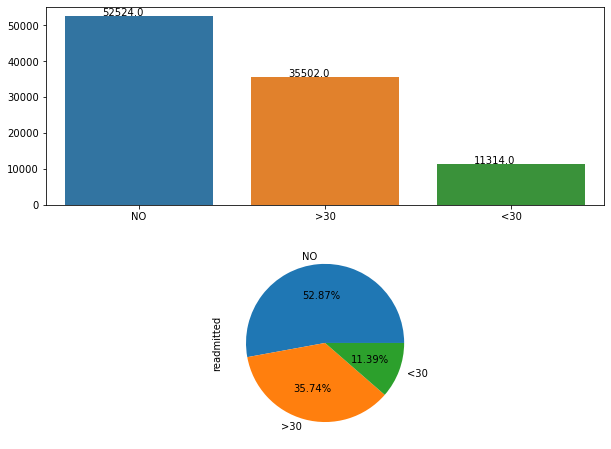

In [385]:
fig,ax = plt.subplots(2,1, figsize = (10,8))
plot = sns.barplot(data=df, x=df['readmitted'].value_counts().index, y=df['readmitted'].value_counts().values, ax = ax[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+100))
df['readmitted'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

#### Our target column readmitted has three values which reflect readmission more than 30 days less than 30 days and No meaning that they are readmitted. Around 11% of the patients are being readmitted within 30 days of discharge from the hospital

#### Since our aim is to predict the patients who are getting readmitted to the hospital within 30 days, we will consider <30 days as 1 and others i.e. no and >30 as 0

In [386]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x=='<30' else 0)
df['readmitted'].value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

#### Dropping payer_code, medical_specialty as they have maximum number of of missing values

In [387]:
df = df.drop(['payer_code', 'medical_specialty'],axis = 1)

## Bivariate Analysis (analyze the impact of all continous variables with respect to target variable using box plot)

## Time_in_Hospital and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='time_in_hospital'>

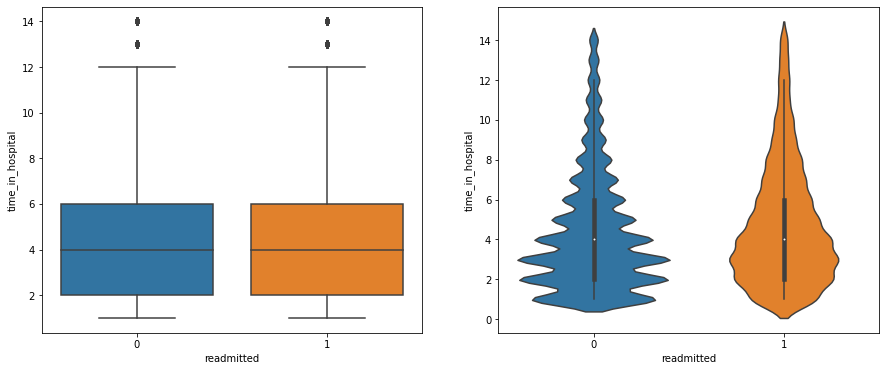

In [388]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['time_in_hospital'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['time_in_hospital'])

#### Box plot shows that for time_in_hospital there is a similar distribution for people  who are readmitted within 30 days and for people not being readmitted within 30days few outliers

## Num_lab_procedures and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='num_lab_procedures'>

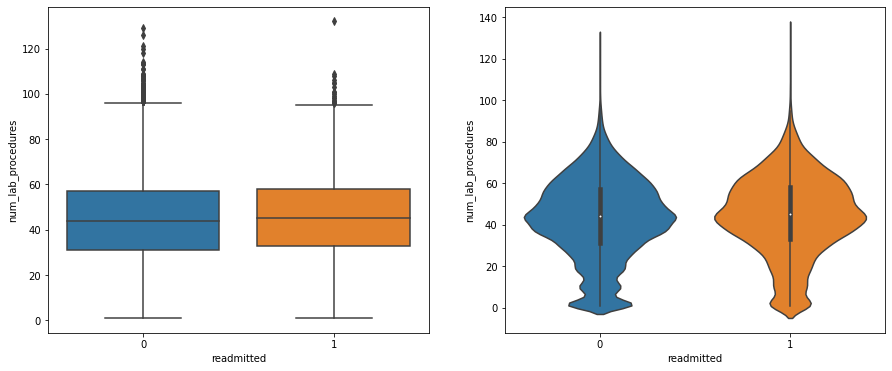

In [389]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['num_lab_procedures'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['num_lab_procedures'])

#### Just as we have seen in box_plot, there is a similar distribution of number of lab procedures for both the values of readmitted. However, we can clearly see from the box plot that for patients who are not being readmitted within 30days, there are comparitively more outliers than patients who are being readmitted within 30 days 

## Num_medications and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='num_medications'>

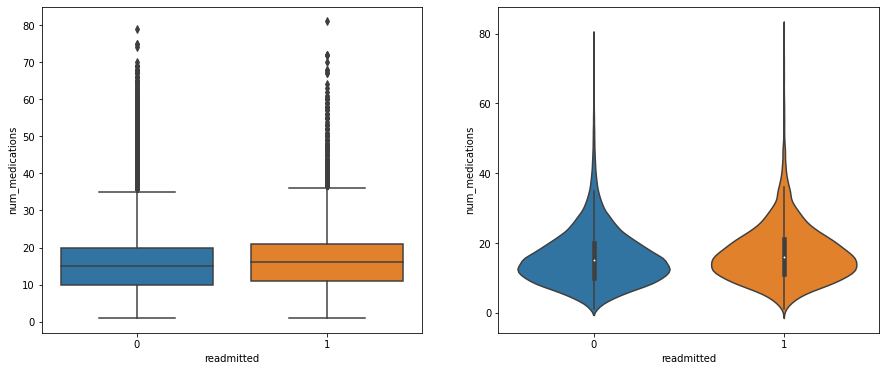

In [390]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['num_medications'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['num_medications'])

#### Box plot and violin plot shows that for num_medications there is a similar distribution for people  who are readmitted within 30 days and for people not being readmitted within 30days few outliers

## Num_procedures and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='num_procedures'>

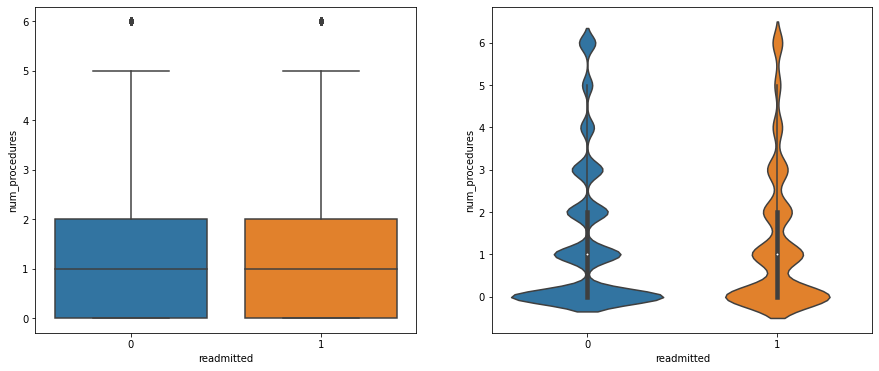

In [391]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['num_procedures'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['num_procedures'])

#### Box plot and violin plot shows that for num_procedures there is a similar distribution for people  who are readmitted within 30 days and for people not being readmitted within 30 days few outliers

## Number_diagnoses and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='number_diagnoses'>

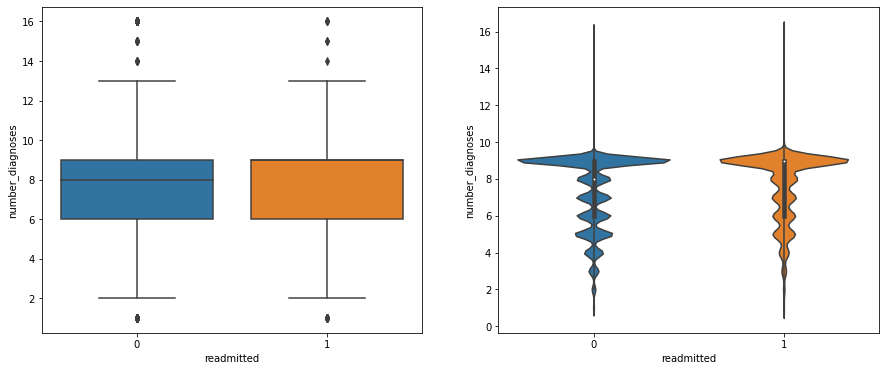

In [392]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['number_diagnoses'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['number_diagnoses'])

#### Box plot and violin plot shows that for number_diagnoses there is a similar distribution for people  who are readmitted within 30 days and for people not being readmitted within 30 days few outliers

## Number_emergency and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='number_emergency'>

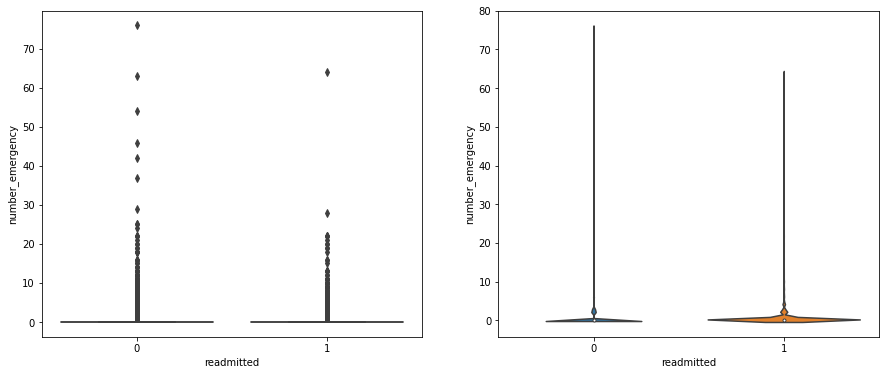

In [393]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['number_emergency'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['number_emergency'])

#### Box plot and violin plot shows that for number_emergency there is a similar distribution for people who are readmitted within 30 days and for people not being readmitted within 30 days. There are outliers in the dataset and most of the datapoints are situated at 0

## Number_inpatient and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='number_inpatient'>

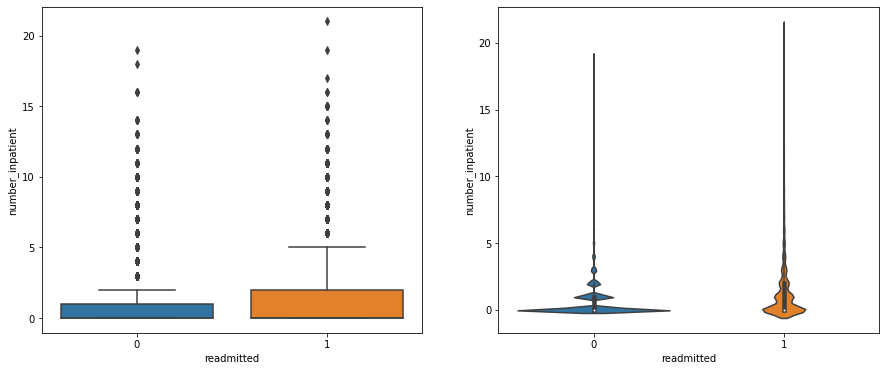

In [394]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['number_inpatient'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['number_inpatient'])

#### The box plot shows that for people who are getting readmitted within 30 days, there utilization of inpatient facilities is more when compared to other values of readmitted.

## Number_outpatient and Readmitted

<AxesSubplot:xlabel='readmitted', ylabel='number_outpatient'>

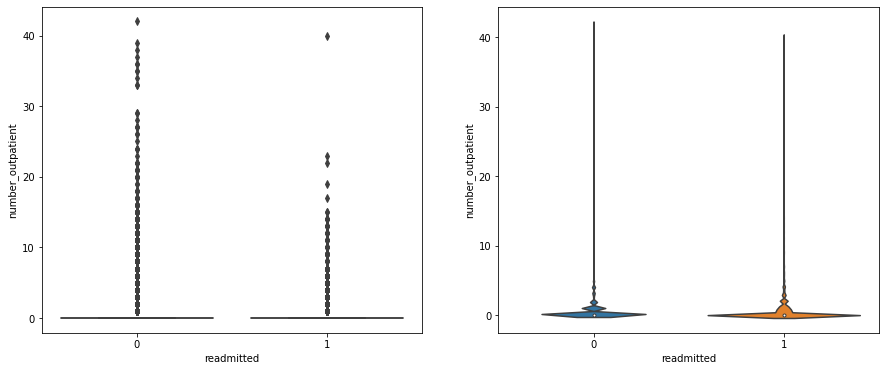

In [395]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['number_outpatient'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['number_outpatient'])

#### As can be seen from the box plot and from the violin plot, most of the values are zero with outliers present for all the values of readmitted

<AxesSubplot:xlabel='readmitted', ylabel='Hospital_Utilization'>

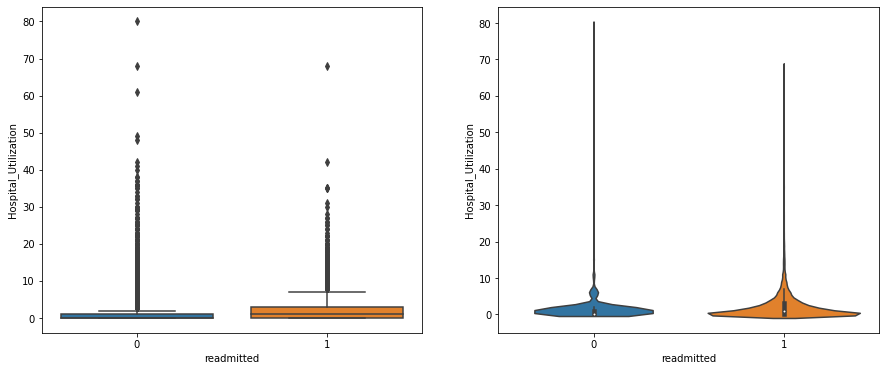

In [396]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['Hospital_Utilization'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['Hospital_Utilization'])

#### Hospital Utilization has similar distribution with respect to readmitted. Further it can also be notted that for patients who were not readmitted within 30 days there are considerable amount of outliers

<AxesSubplot:xlabel='readmitted', ylabel='medication_change'>

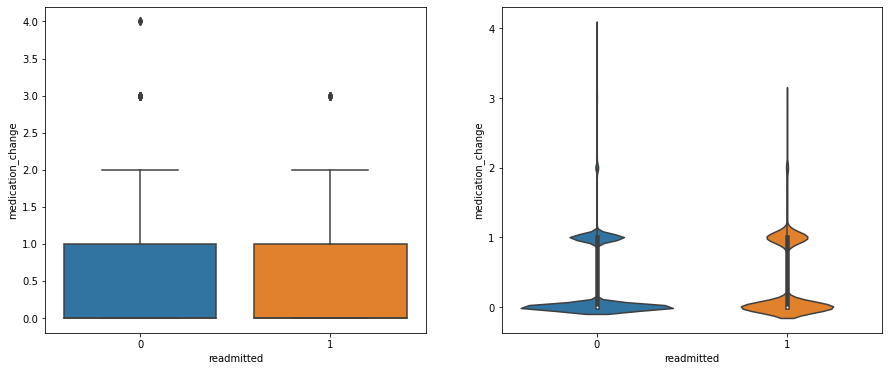

In [397]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['medication_change'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['medication_change'])

#### Medication_Change for both readmitted within 30 days and not has similar distribution. 

<AxesSubplot:xlabel='readmitted', ylabel='medications_used'>

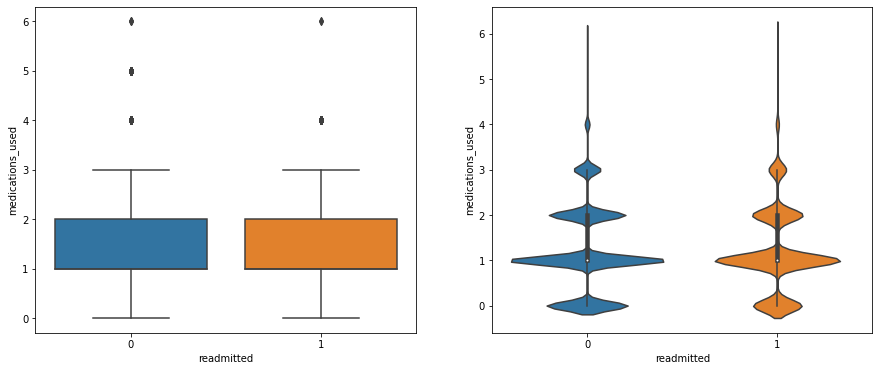

In [398]:
fig,ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(data = df, x=df['readmitted'], y=df['medications_used'], ax = ax[0])
sns.violinplot(data=df, x=df['readmitted'], y=df['medications_used'])

## Categorical features with target feature

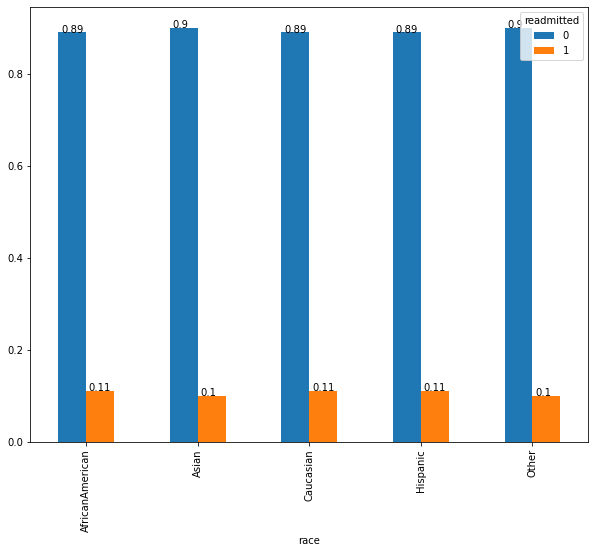

In [399]:
plot = round(pd.crosstab(df['race'], df['readmitted']).apply(lambda x: x/x.sum(), axis = 1),2).plot(kind = 'bar', figsize = (10,8))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/10,p.get_height()))

#### Fromt the crosstab we can see that the percentage of people not being readmitted is highest in Asian and Other race. While it is the lowest in Caucasian, followed by AfricanAmerican.
#### Simiilarly, Caucasian and AfricanAmerican have the highest percentage of readmission within 30 days. 

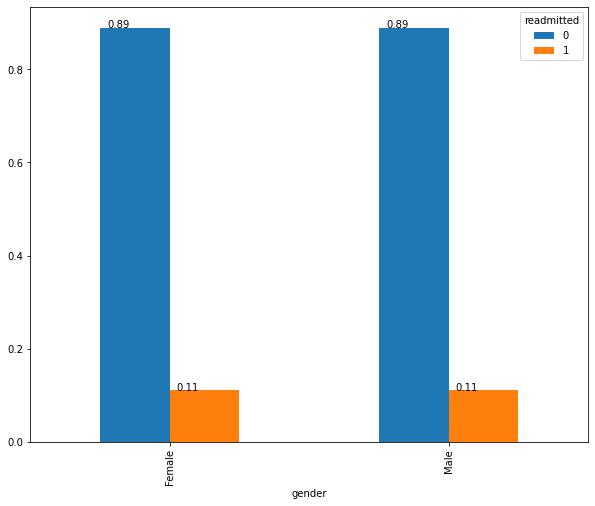

In [400]:
plot = round(pd.crosstab(df['gender'], df['readmitted']).apply(lambda x: x/x.sum(), axis = 1),2).plot(kind = 'bar', figsize = (10,8))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/10,p.get_height()))

#### there is not much of a difference in the gender feature. Both male and female have almost the same percentage of differnce for readmitted

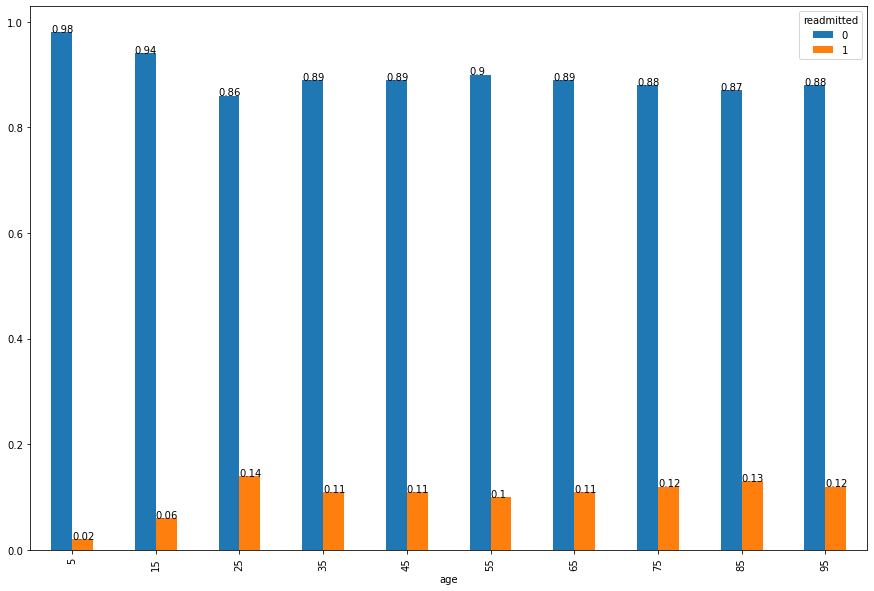

In [401]:
plot = round(pd.crosstab(df['age'], df['readmitted']).apply(lambda x: x/x.sum(), axis = 1),2).plot(kind = 'bar', figsize = (15,10))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/2000,p.get_height()))

#### For age feature as expected people who belong to age category of within 40 years, there chances of being not readmitted is very high compared to the older group


#### Most interesting is that people who are being readmitted within 30 days is highest for the age group of 20-30. Quite surprising as they should have higher immunity when compared with other age groups

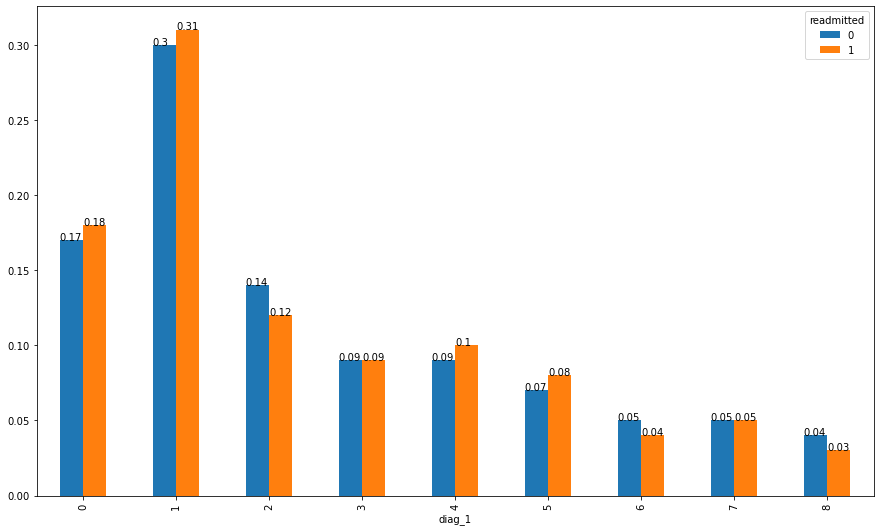

In [402]:
plot = round(pd.crosstab(df['diag_1'], df['readmitted']).apply(lambda x:x/x.sum()),2).plot(kind = 'bar', figsize = (15,9))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/20000,p.get_height()))

#### Circulatory disease has the most patients being readmitted within 30days, reason being that daibetes also affects the heart muscle causing both systolic and diastolic heart failure.

#### The same is for diag_2 and diag_3

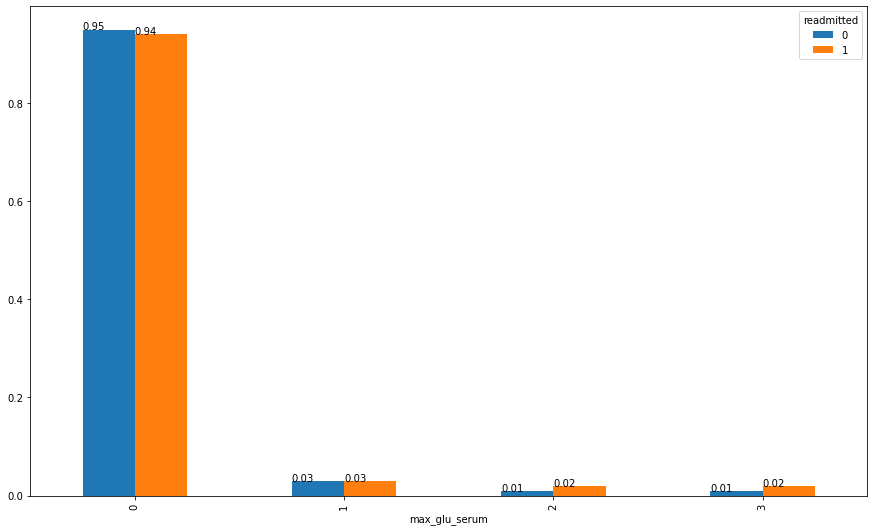

In [403]:
plot = round(pd.crosstab(df['max_glu_serum'], df['readmitted']).apply(lambda x:x/x.sum()),2).plot(kind = 'bar', figsize = (15,9))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/20000,p.get_height()))

#### As expected as most of the patients were not tested for max_glu_serum, the possibility of being readmitted within 30 days is also highest amoung these cases

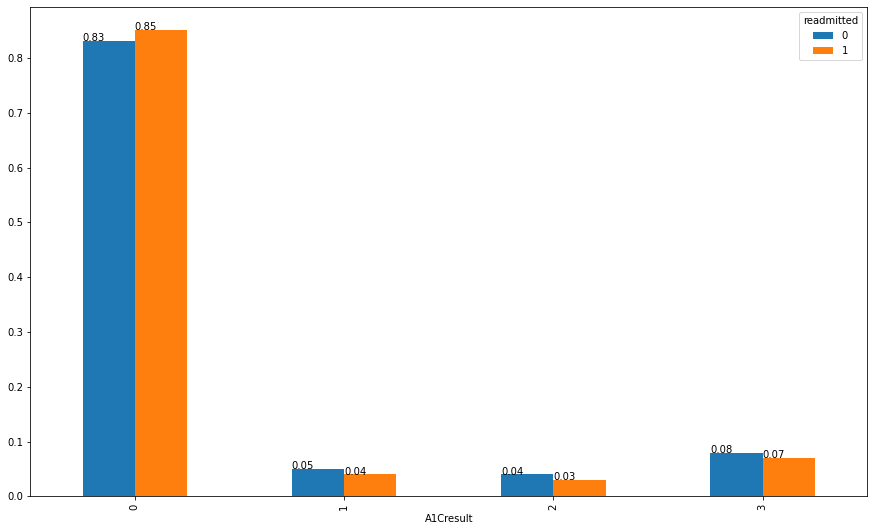

In [404]:
plot = round(pd.crosstab(df['A1Cresult'], df['readmitted']).apply(lambda x:x/x.sum()),2).plot(kind = 'bar', figsize = (15,9))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/20000,p.get_height()))

#### It is the same for A1Cresult, the possibility of being readmitted within 30 days is also highest amoung these cases


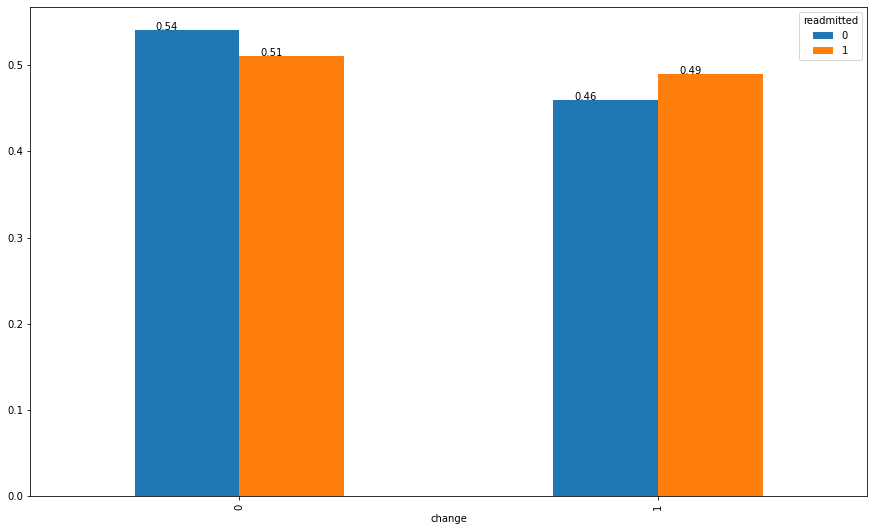

In [405]:
plot = round(pd.crosstab(df['change'], df['readmitted']).apply(lambda x:x/x.sum()),2).plot(kind = 'bar', figsize = (15,9))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/5,p.get_height()))

#### For change, the possibility of being readmitted to the hospital within 30 days is more or less same for change and no change values

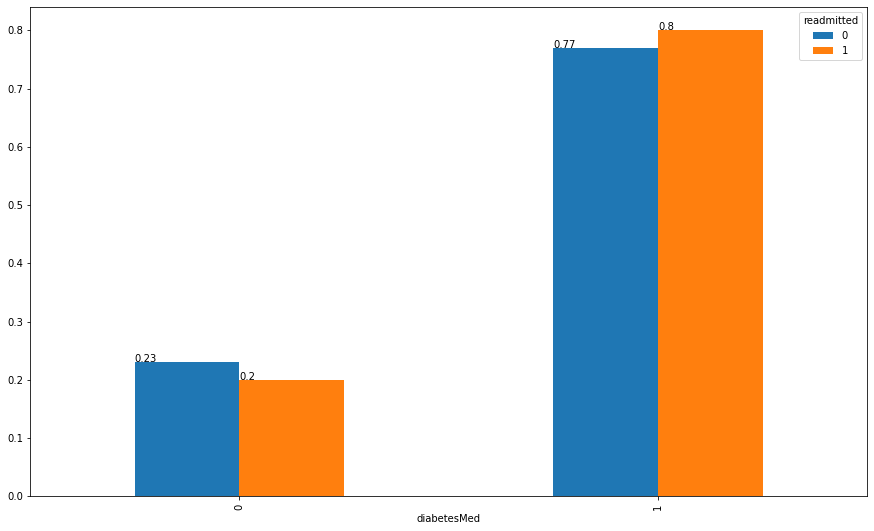

In [406]:
plot = round(pd.crosstab(df['diabetesMed'], df['readmitted']).apply(lambda x:x/x.sum()),2).plot(kind = 'bar', figsize = (15,9))
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/20000,p.get_height()))

#### As expected most of the patients were prescribed medications and when it comes to readmitted, we can see that people who were prescribed medications there probability of getting readmitted is high cmpared to patients who were not prescribed medications

#### Multivariate Analysis for numerical features

In [407]:
df_num = df.select_dtypes(include = np.number)

df_num.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Hospital_Utilization', 'medication_change', 'medications_used'],
      dtype='object')

In [408]:
i = ['admission_type_id','discharge_disposition_id', 'admission_source_id', 'change',
       'diabetesMed','metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

df[i] = df[i].astype('object')

<AxesSubplot:>

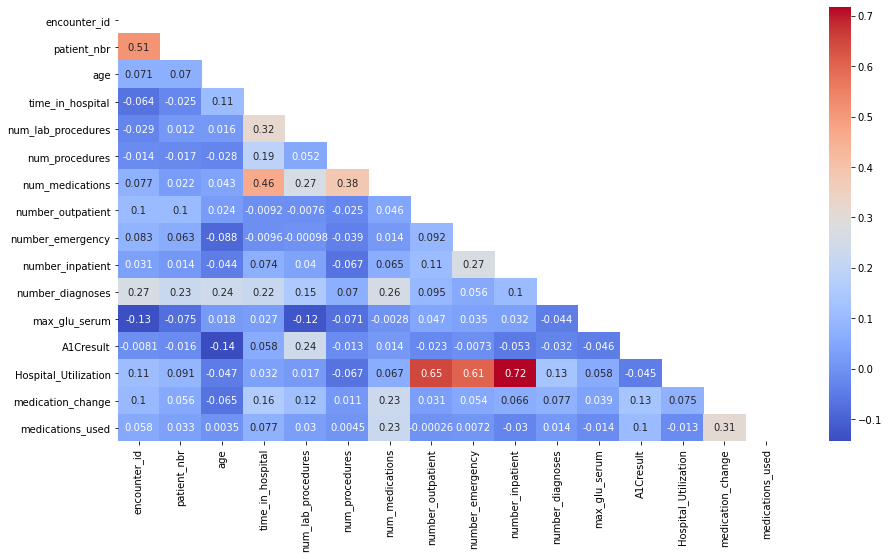

In [409]:
df_num = df.select_dtypes(include=np.number)

plt.figure(figsize=(15,8))

corr = df_num.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

#### From the heatmap we can see that most of the features are not correlated to each other with the exception of hospital_utilization, number_outpatient, number_inpatient, number_emergency. Incase of high correlation between independent features, there exists a strong multicollinearity (one independent feature influences another independent feature) between independent features

<AxesSubplot:>

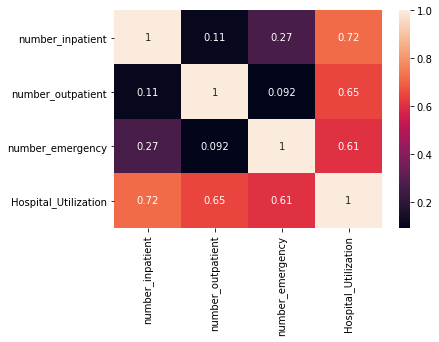

In [410]:
cols = df[['number_inpatient','number_outpatient','number_emergency','Hospital_Utilization']]

sns.heatmap(cols.corr(), annot=True)

#### There is a strong correlation between the above, features. Since we have captured the importance of these features, we will drop them from our dataset, as we have already captured the importance of these features

In [411]:
df = df.drop(['number_inpatient','number_outpatient','number_emergency'],axis = 1)

#### We have captured the impact of individual medications through medication_change and medications_used, so we will remove all the individual medication features from our dataset

In [412]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',  'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

df = df.drop(df[cols],axis = 1)

#### For the numerical column, we will check the skewness and kurtosis by using log transformation if it has a threshold of more than 2 (The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution )

In [414]:
i = ['A1Cresult','max_glu_serum']

df[i] = df[i].astype(np.number)

In [415]:
df_num = list(set(list(df.select_dtypes(include = np.number).columns))-{'readmitted','encounter_id','patient_nbr'})
df_num

['num_medications',
 'medications_used',
 'number_diagnoses',
 'age',
 'A1Cresult',
 'num_procedures',
 'medication_change',
 'time_in_hospital',
 'max_glu_serum',
 'Hospital_Utilization',
 'num_lab_procedures']

In [416]:
num_data = pd.DataFrame()
num_data['numeric'] = df_num

skewness_before = []
skewness_after = []

kurtosis_before = []
kurtosis_after = []

std_dvt_before = []
std_dvt_after = []

log_needed = [] #### If log transformation is needed

log_type = [] #### Type of log transformation

for i in df_num:
    skew1 = df[i].skew()
    skewness_before.append(skew1)
    
    kurt1 = df[i].kurtosis()
    kurtosis_before.append(kurt1)
    
    std1 = df[i].std()
    std_dvt_before.append(std1)
    
    if (abs(skew1)>1) & (abs(kurt1)>1):
        log_needed.append('yes')
        
        if len(df[df[i]==0])/len(df)<0.02:
            log_type.append('log')
            skew1new = np.log(pd.DataFrame(df[df[i]>0])[i]).skew()
            skewness_after.append(skew1new)
            
            kurt1new = np.log(pd.DataFrame(df[df[i]>0])[i]).kurtosis()
            kurtosis_after.append(kurt1new)
            
            std1new = np.log(pd.DataFrame(df[df[i]>0])[i]).std()
            std_dvt_after.append(std1new)
        
        else:
            log_type.append('log1p')
            skew1new = np.log1p(pd.DataFrame(df[df[i]>0])[i]).skew()
            skewness_after.append(skew1new)
            
            kurt1new = np.log1p(pd.DataFrame(df[df[i]>0])[i]).kurtosis()
            kurtosis_after.append(kurt1new)
            
            std1new = np.log1p(pd.DataFrame(df[df[i]>0])[i]).std()
            std_dvt_after.append(std1new)
    else:
        log_type.append('NA')
        log_needed.append('No')
        
        skewness_after.append(skew1)
        kurtosis_after.append(kurt1)
        std_dvt_after.append(std1)
        
num_data['Skewness_before'] = skewness_before
num_data['Kurtosis_before'] = kurtosis_before
num_data['Std_Before'] = std_dvt_before
num_data['Log_needed'] = log_needed
num_data['Log_type'] = log_type
num_data['Skewness_After'] = skewness_after
num_data['Kurtosis_After'] = kurtosis_after
num_data['Std_After'] = std_dvt_after


In [417]:
num_data

numeric  Skewness_before  Kurtosis_before  Std_Before  \
0        num_medications         1.335408         3.533154    8.094931   
1       medications_used         0.673945         0.273654    0.922431   
2       number_diagnoses        -0.861486        -0.122062    1.940990   
3                    age        -0.624760         0.271597   15.945362   
4              A1Cresult         2.262886         3.551483    0.894933   
5         num_procedures         1.322209         0.876844    1.702770   
6      medication_change         1.427689         1.445490    0.487866   
7       time_in_hospital         1.141853         0.887650    2.968393   
8          max_glu_serum         5.304694        29.062163    0.426939   
9   Hospital_Utilization         5.349169        68.061879    2.294240   
10    num_lab_procedures        -0.241522        -0.252960   19.609887   

   Log_needed Log_type  Skewness_After  Kurtosis_After  Std_After  
0         yes      log       -0.747965        1.851827   0.538384  
1          No       NA        0.673945        0.273654   0.922431  
2          No       NA       -0.861486       -0.122062   1.940990  
3          No       NA       -0.624760        0.271597  15.945362  
4         yes    log1p       -0.515726       -1.426491   0.296070  
5          No       NA        1.322209        0.876844   1.702770  
6         yes    log1p        4.368166       18.851227   0.097262  
7          No       NA        1.141853        0.887650   2.968393  
8         yes    log1p        0.341146       -1.516771   0.286997  
9         yes    log1p        1.164500        1.172230   0.509778  
10         No       NA       -0.241522       -0.252960  19.609887

#### From the above we can see that Log_type of log1p is to be applied for 4 columns (Hospital_Utilization, number_outpatient, number_emergency,number_inpatient)

In [419]:
i = ['max_glu_serum','A1Cresult','Hospital_Utilization','medication_change']
df[i] = np.log1p(df[i])
df['num_medications'] = df['num_medications'].apply(lambda x: np.log(x))

In [421]:
df_num = list(set(list(df.select_dtypes(include=np.number)))-{'readmitted', 'encounter_id','patient_nbr'})

In [422]:
df_num

['num_medications',
 'medications_used',
 'number_diagnoses',
 'age',
 'A1Cresult',
 'num_procedures',
 'medication_change',
 'time_in_hospital',
 'max_glu_serum',
 'Hospital_Utilization',
 'num_lab_procedures']

#### From the dataset we can see that few features like time_in_hospital, num_medications have some interaction between them. So we will create new features from our dataset which have interaction between them

In [423]:
interaction = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital')]

In [424]:
for i in interaction:
    name = i[0] + '|' + i[1]
    df[name] = df[i[0]] * df[i[1]]

#### We have more than one encounter for unique patient numbers for many patient records, we will drop the duplicates by keeping the first encounter

In [425]:
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')

#### Dropping encounter_id, patient_nbr dataset as they do not hold any value towards our business objective

In [426]:
df = df.drop(['encounter_id','patient_nbr'],axis = 1)

In [427]:
df['change|num_medications'] = df['change|num_medications'].astype(np.number)

#### We will remodify the columns (reordering the numerical column before categorical columns)

In [428]:
cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','max_glu_serum', 'A1Cresult',
       'num_medications', 'number_diagnoses', 
       'Hospital_Utilization', 'medication_change', 'medications_used',
       'num_medications|time_in_hospital', 'num_medications|num_procedures',
       'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital','race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id',  'diag_1',
       'diag_2', 'diag_3', 'change',
       'diabetesMed', 'readmitted']

df = df[cols]

#### Using selectkbest to select the best number of features for our model. We will select features whose chi2_scores are above 5 from a total of 29 features to proceed with our model building. Before doing that we will convert categorical variable using label encoding

In [429]:
df['race'] = df['race'].replace({'Caucasian':1,'AfricanAmerican':2,'Hispanic':3,'Other':4, 'Asian':5})
df['gender'] = df['gender'].replace({'Male':1, 'Female':2})

In [430]:
df_cat = df.select_dtypes(include = 'object')
i = df_cat.columns
df[i] = df[i].astype(np.number)

In [431]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop(['readmitted'],axis = 1)
y = df['readmitted']

In [432]:
df_scores = SelectKBest(score_func=chi2, k=15)
fit = df_scores.fit(X,y)
feature_Scores = pd.DataFrame(fit.scores_, index = X.columns, columns = ['chi2 score']).sort_values(by = 'chi2 score', ascending = False)
feature_Scores

chi2 score
time_in_hospital|num_lab_procedures  33982.074568
age|number_diagnoses                 15832.857200
number_diagnoses|time_in_hospital     5201.297745
num_medications|num_lab_procedures    4566.620230
num_medications|time_in_hospital      1761.104135
num_lab_procedures                     663.940871
age                                    604.928388
num_medications|number_diagnoses       569.703523
time_in_hospital                       439.304943
Hospital_Utilization                   310.131414
discharge_disposition_id               101.608333
number_diagnoses                        80.689225
change|num_medications                  44.773561
medication_change                       20.178467
num_medications                         14.874242
diabetesMed                             12.821971
num_medications|num_procedures          11.796369
admission_source_id                      9.221513
change                                   8.130435
A1Cresult                                7.111171
medications_used                         6.812534
max_glu_serum                            6.149504
diag_3                                   5.202495
diag_1                                   3.847647
race                                     2.958861
diag_2                                   0.990974
admission_type_id                        0.711978
gender                                   0.049595
num_procedures                           0.011085

In [433]:
i = ['time_in_hospital|num_lab_procedures','age|number_diagnoses','number_diagnoses|time_in_hospital',
     'num_medications|num_lab_procedures','num_medications|time_in_hospital','num_lab_procedures','age','num_medications|number_diagnoses',
    'time_in_hospital','Hospital_Utilization','number_diagnoses','change|num_medications',
    'medication_change','num_medications','num_medications|num_procedures','diabetesMed','discharge_disposition_id',
     'readmitted']

df = df[i]

#### Converting back to the original datatypes

In [435]:
i = ['discharge_disposition_id','diabetesMed']

df[i] = df[i].astype('object')

#### Converting categoricall features into numerical using get_dummies method

#### Splitting the original dataset into independent and dependent features

In [436]:
X = df.drop(['readmitted'],axis = 1)

y = df['readmitted']

y = y.astype(np.number)

#### Train Test Splitting independent and dependent features

In [437]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### Power Transforming X_train and X_test numerical features to bring them into one scale

In [438]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

X_train.iloc[:,:15] = pt.fit_transform(X_train.iloc[:,:15])
X_test.iloc[:,:15] = pt.transform(X_test.iloc[:,:15])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Converting categoricall features into numerical using get_dummies method

In [439]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(drop='first')

cat_features_train = X_train.select_dtypes(include = 'object')
cat_features_test = X_test.select_dtypes(include = 'object')

num_features_train = X_train.select_dtypes(include = np.number)
num_features_test = X_test.select_dtypes(include=np.number)

one_train  = one.fit_transform(cat_features_train).toarray()

one_test = one.transform(cat_features_test).toarray()

one.get_feature_names(cat_features_train.columns)

train_encode = pd.DataFrame(one_train, columns=one.get_feature_names(cat_features_train.columns))

test_encode = pd.DataFrame(one_test, columns=one.get_feature_names(cat_features_test.columns))

train_encode = train_encode.reset_index(drop=True)
num_features_train = num_features_train.reset_index(drop = True)
test_encode = test_encode.reset_index(drop=True)
num_features_test = num_features_test.reset_index(drop = True)

X_train = pd.concat([num_features_train, train_encode],axis = 1)

X_test = pd.concat([num_features_test, test_encode],axis = 1)

#### Building a base model without treating the imbalanced dataset

Accuracy Score : 0.9083678620755345
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
AUC Score : 0.6295350569586401


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


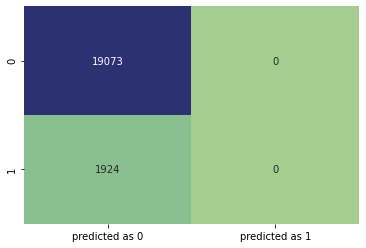

In [440]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=10000)
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)
y_prob = logit.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report, roc_curve

acc_log = accuracy_score(y_test,y_pred)
pre_log = precision_score(y_test,y_pred)
rec_log = recall_score(y_test,y_pred)
f1_log = f1_score(y_test,y_pred)
roc_log = roc_auc_score(y_test,y_prob)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('AUC Score : ' + str(roc_auc_score(y_test,y_prob)))


#Logistic Regression Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(y_test, y_prob)
roc_score = roc_auc_score(y_test,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### As expected the model is doing a good job predicting the majority class and not at all able to predict the minority class

In [441]:
df['readmitted'].value_counts(normalize = True)

0.0    0.910198
1.0    0.089802
Name: readmitted, dtype: float64

#### As can be seen, we have only 10% records corresponding to the readmission category. As with most models, algorithms work best when the number of samples in each class are about equal. Standard classification algorithms have a bias towards classes which have higher number instances. They tend to predict only the majority class data. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

#### There are number of ways for treating imbalanced dataset, we will be using SMOTE technique to treat the imbalanced dataset. But before doing that we will split the dataset into train and test data and then implement SMOTE 

In [442]:
#applying smote to oversample since the variable to be predicted is imbalanced 
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [443]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain_smote, xtest, ytrain_smote, ytest = train_test_split(X_train_smote, y_train_smote, test_size=0.20, random_state=0)

## Logistic Regression

Accuracy Score : 0.5975801030696841
Precision Score : 0.616551724137931
Recall Score : 0.5437354860112794
F1 Score : 0.5778587378070279
AUC Score : 0.6293518459947677


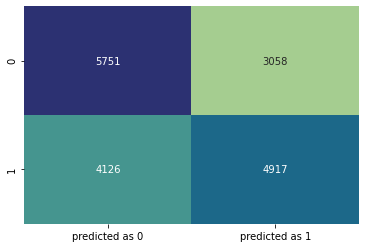

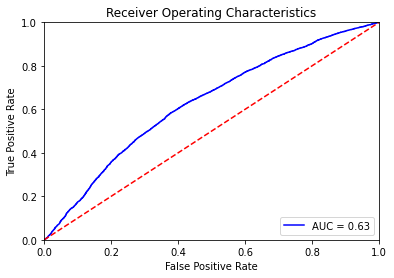

In [444]:
logit = LogisticRegression(max_iter=10000)
logit.fit(xtrain_smote,ytrain_smote)
y_pred = logit.predict(xtest)
y_prob = logit.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report, roc_curve

acc_log = accuracy_score(ytest,y_pred)
pre_log = precision_score(ytest,y_pred)
rec_log = recall_score(ytest,y_pred)
f1_log = f1_score(ytest,y_pred)
roc_log = roc_auc_score(ytest,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest,y_pred)))
print('Precision Score : ' + str(precision_score(ytest,y_pred)))
print('Recall Score : ' + str(recall_score(ytest,y_pred)))
print('F1 Score : ' + str(f1_score(ytest,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest,y_prob)))


#Logistic Regression Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest, y_prob)
roc_score = roc_auc_score(ytest,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Naive Bayes Classifier

In [445]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(xtrain_smote,ytrain_smote)

GaussianNB()

Accuracy Score : 0.5722047949809546
Precision Score : 0.5685185185185185
Recall Score : 0.6450293044343691
F1 Score : 0.6043620162669014
AUC Score : 0.6043052311952579


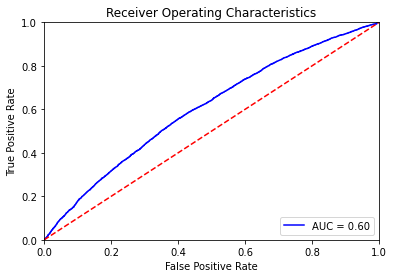

In [446]:
y_pred = nb.predict(xtest)
y_prob = nb.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report

acc_nb = accuracy_score(ytest,y_pred)
pre_nb = precision_score(ytest,y_pred)
rec_nb = recall_score(ytest,y_pred)
f1_nb = f1_score(ytest,y_pred)
roc_nb = roc_auc_score(ytest,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest,y_pred)))
print('Precision Score : ' + str(precision_score(ytest,y_pred)))
print('Recall Score : ' + str(recall_score(ytest,y_pred)))
print('F1 Score : ' + str(f1_score(ytest,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest,y_prob)))


#Naive Bayes Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest, y_prob)
roc_score = roc_auc_score(ytest,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## KNearestNeighbors Classifier


In [447]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(xtrain_smote,ytrain_smote)



KNeighborsClassifier()

Accuracy Score : 0.8382254089177683
Precision Score : 0.7627871232174879
Recall Score : 0.9878358951675329
F1 Score : 0.8608461019562494
AUC Score : 0.9316225387346316


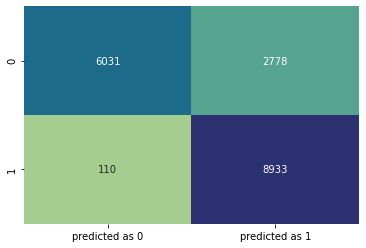

In [448]:
y_pred = knn.predict(xtest)
y_prob = knn.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report

acc_knn = accuracy_score(ytest,y_pred)
pre_knn = precision_score(ytest,y_pred)
rec_knn = recall_score(ytest,y_pred)
f1_knn = f1_score(ytest,y_pred)
roc_knn = roc_auc_score(ytest,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest,y_pred)))
print('Precision Score : ' + str(precision_score(ytest,y_pred)))
print('Recall Score : ' + str(recall_score(ytest,y_pred)))
print('F1 Score : ' + str(f1_score(ytest,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest,y_prob)))


#KNearestNeighbors Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest, y_prob)
roc_score = roc_auc_score(ytest,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Decision Tree Classifier

In [449]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier()

dec.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier()

Accuracy Score : 0.8883598476361192
Precision Score : 0.8822381262199089
Recall Score : 0.8997014265177485
F1 Score : 0.8908842047632084
AUC Score : 0.8882833882043897


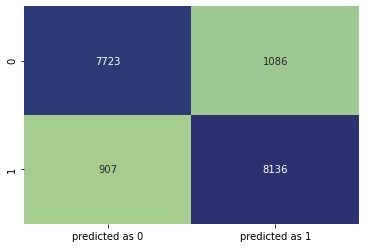

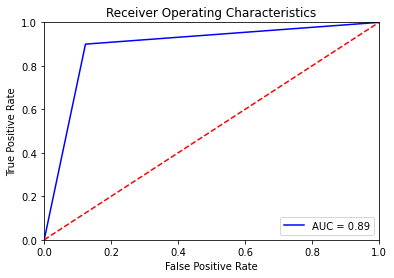

In [450]:
y_pred = dec.predict(xtest)
y_prob = dec.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report

acc_dec = accuracy_score(ytest,y_pred)
pre_dec = precision_score(ytest,y_pred)
rec_dec = recall_score(ytest,y_pred)
f1_dec = f1_score(ytest,y_pred)
roc_dec = roc_auc_score(ytest,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest,y_pred)))
print('Precision Score : ' + str(precision_score(ytest,y_pred)))
print('Recall Score : ' + str(recall_score(ytest,y_pred)))
print('F1 Score : ' + str(f1_score(ytest,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest,y_prob)))


#Decision Tree Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest, y_prob)
roc_score = roc_auc_score(ytest,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Random Forest

In [451]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier()

Accuracy Score : 0.9446560609455523
Precision Score : 0.9781550516443073
Recall Score : 0.9110914519517859
F1 Score : 0.943432955456315
AUC Score : 0.9815338258436468


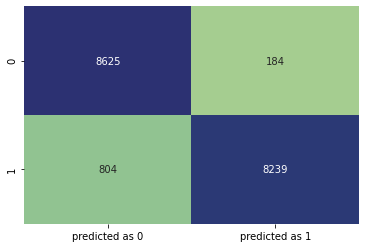

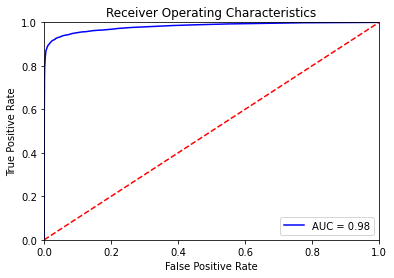

In [452]:
y_pred = rfc.predict(xtest)
y_prob = rfc.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report

acc_rfc = accuracy_score(ytest,y_pred)
pre_rfc = precision_score(ytest,y_pred)
rec_rfc = recall_score(ytest,y_pred)
f1_rfc = f1_score(ytest,y_pred)
roc_rfc = roc_auc_score(ytest,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest,y_pred)))
print('Precision Score : ' + str(precision_score(ytest,y_pred)))
print('Recall Score : ' + str(recall_score(ytest,y_pred)))
print('F1 Score : ' + str(f1_score(ytest,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest,y_prob)))


#Random Forest Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest, y_prob)
roc_score = roc_auc_score(ytest,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## AdaBoost Classifier

In [453]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(xtrain_smote,ytrain_smote)

AdaBoostClassifier()

Accuracy Score : 0.7842258570468295
Precision Score : 0.8714755975382854
Recall Score : 0.6733384938626562
F1 Score : 0.7597005614472863
AUC Score : 0.8527235831047352


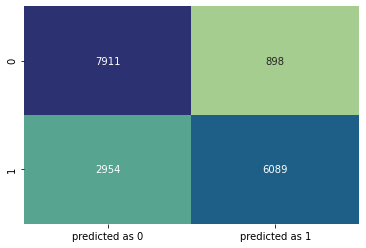

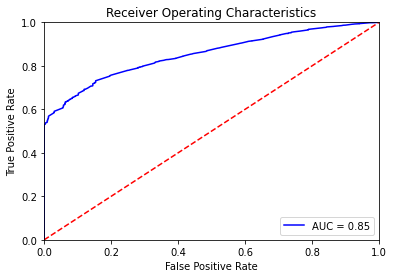

In [454]:
y_pred = ada.predict(xtest)
y_prob = ada.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report

acc_ada = accuracy_score(ytest,y_pred)
pre_ada = precision_score(ytest,y_pred)
rec_ada = recall_score(ytest,y_pred)
f1_ada = f1_score(ytest,y_pred)
roc_ada = roc_auc_score(ytest,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest,y_pred)))
print('Precision Score : ' + str(precision_score(ytest,y_pred)))
print('Recall Score : ' + str(recall_score(ytest,y_pred)))
print('F1 Score : ' + str(f1_score(ytest,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest,y_prob)))


#AdaBoost Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest, y_prob)
roc_score = roc_auc_score(ytest,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## As of now, we have recorded the performance metrics of all our base models. In the next step, we will select the best algorithm out of the base models by doing a comparative study of the algorithms against all the performance metrics.

In [455]:
metrics = pd.DataFrame({'Model_Name':['Logistic_Regression','Naive Bayes Classifier','KNearestNeighbors Classifier',
                                    'DecisionTree Classifier', 'RandomForest Classifier','AdaBoost Classifier'],
                        'Accuracy':[acc_log,acc_nb,acc_knn,acc_dec,acc_rfc,acc_ada],
                        'Precision':[pre_log,pre_nb,pre_knn,pre_dec,pre_rfc,pre_ada],
                        'Recall':[rec_log,rec_nb,rec_knn,rec_dec,rec_rfc,rec_ada],
                        'F1':[f1_log,f1_nb,f1_knn,f1_dec,f1_rfc,f1_ada],
                        'Roc_Auc':[roc_log,roc_nb,roc_knn,roc_dec,roc_rfc,roc_ada]})
metrics.set_index('Model_Name', inplace = True)

In [456]:
metrics

Accuracy  Precision    Recall        F1  \
Model_Name                                                              
Logistic_Regression           0.597580   0.616552  0.543735  0.577859   
Naive Bayes Classifier        0.572205   0.568519  0.645029  0.604362   
KNearestNeighbors Classifier  0.838225   0.762787  0.987836  0.860846   
DecisionTree Classifier       0.888360   0.882238  0.899701  0.890884   
RandomForest Classifier       0.944656   0.978155  0.911091  0.943433   
AdaBoost Classifier           0.784226   0.871476  0.673338  0.759701   

                               Roc_Auc  
Model_Name                              
Logistic_Regression           0.629352  
Naive Bayes Classifier        0.604305  
KNearestNeighbors Classifier  0.931623  
DecisionTree Classifier       0.888283  
RandomForest Classifier       0.981534  
AdaBoost Classifier           0.852724

## Accuracy

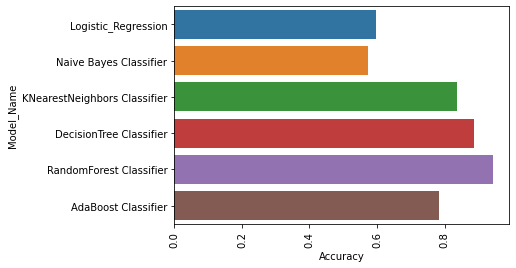

In [457]:
plot = sns.barplot(data=metrics, y=metrics.index, x=metrics['Accuracy'])
plt.xticks(rotation = 90)
plt.show()

## Precision

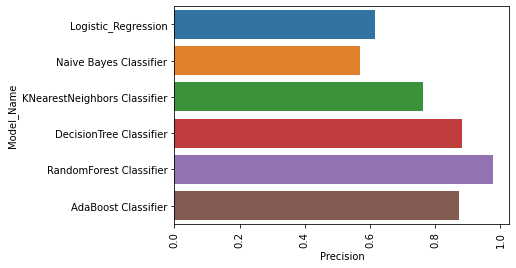

In [458]:
plot = sns.barplot(data=metrics, y=metrics.index, x=metrics['Precision'])
plt.xticks(rotation = 90)
plt.show()

## Recall

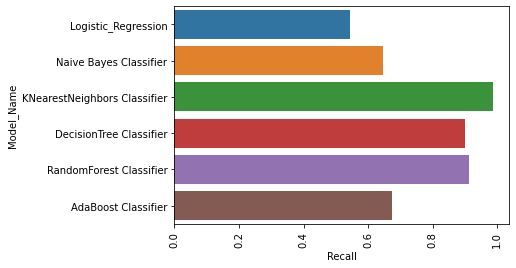

In [459]:
plot = sns.barplot(data=metrics, y=metrics.index, x=metrics['Recall'])
plt.xticks(rotation = 90)
plt.show()

## F1 Score

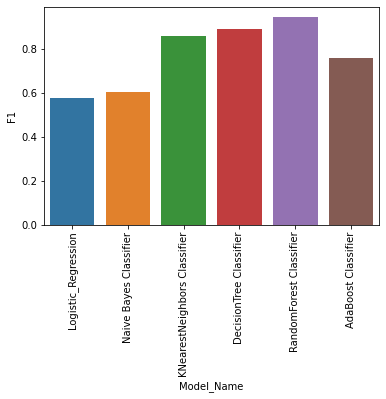

In [460]:
plot = sns.barplot(data=metrics, x=metrics.index, y=metrics['F1'])
plt.xticks(rotation = 90)
plt.show()

## Roc_Auc

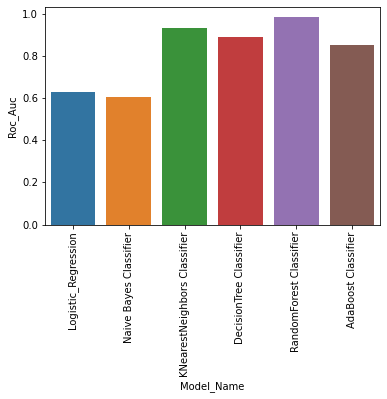

In [461]:
plot = sns.barplot(data=metrics, x=metrics.index, y=metrics['Roc_Auc'])
plt.xticks(rotation = 90)
plt.show()

#### Summary - From the metrics we can infer that RandomForest Classifier is performing very good when compared  with other model

#### SHAP Framework will help to explain our Random Forest model and show which features are more relevant for certain predictions and for the model as a whole.

#### At first we will analyze for a single patient record

In [462]:
show = 0
data_for_pred = X_test.iloc[show]
data_for_pred_array = data_for_pred.values.reshape(1,-1)
rfc.predict_proba(data_for_pred_array)

array([[1., 0.]])

#### For the first record in the test data set, we see that our Random Forest Model has predicted that there is a 56% chance that this patient has belongs to Class 1 (readmitted in less than 30 days), which essentially means that the model predicts the patient to be readmitted in less than 30 days.

In [463]:
import shap

In [464]:
model = shap.TreeExplainer(rfc)
shap_values = model.shap_values(data_for_pred)

shap.initjs()
shap.force_plot(model.expected_value[1], shap_values[1],data_for_pred)

#### The model predicted a value of 0.56, whereas the base value is 0.4986. Feature values causing increased predictions are in red and their visual size shows the magnitude of the feature’s effect. Feature values decreasing the impact are in blue. The biggest impact in increase for this patient record comes from interaction terms i.e. time in hospital and number of lab procedures and decrease comes from the number of medication features

#### We will look at few more shap plots for individual patient records

In [465]:
data_for_pred = X_test.iloc[1]
data_for_pred_array = data_for_pred.values.reshape(1,-1)
print(rfc.predict_proba(data_for_pred_array))
print('Not readmitted')
    
model = shap.TreeExplainer(rfc)
shap_values = model.shap_values(data_for_pred)

shap.initjs()
shap.force_plot(model.expected_value[1], shap_values[1],data_for_pred)

[[0.92 0.08]]
Not readmitted


In [466]:
data_for_pred = X_test.iloc[2]
data_for_pred_array = data_for_pred.values.reshape(1,-1)
print(rfc.predict_proba(data_for_pred_array))
print('Readmitted')
    
model = shap.TreeExplainer(rfc)
shap_values = model.shap_values(data_for_pred)

shap.initjs()
shap.force_plot(model.expected_value[1], shap_values[1],data_for_pred)

[[0.97 0.03]]
Readmitted


In [467]:
data_for_pred = X_test.iloc[3]
data_for_pred_array = data_for_pred.values.reshape(1,-1)
print(rfc.predict_proba(data_for_pred_array))
print('Not readmitted')
    
model = shap.TreeExplainer(rfc)
shap_values = model.shap_values(data_for_pred)

shap.initjs()
shap.force_plot(model.expected_value[1], shap_values[1],data_for_pred)

[[0.88 0.12]]
Not readmitted


In [468]:
data_for_pred = X_test.iloc[4]
data_for_pred_array = data_for_pred.values.reshape(1,-1)
print(rfc.predict_proba(data_for_pred_array))
print('Not readmitted')
model = shap.TreeExplainer(rfc)
shap_values = model.shap_values(data_for_pred)

shap.initjs()
shap.force_plot(model.expected_value[1], shap_values[1],data_for_pred)

[[0.62 0.38]]
Not readmitted


model = shap.TreeExplainer(rfc)
shap_values = model.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)

## SHAP Dependence Contribution Plots
The dependence contribution plots help in investigating the distribution of effects. It shows whether the effect of having a certain value for a feature depends on the values of other features.

shap.dependence_plot('time_in_hospital', shap_values[1],X_test,interaction_index='age')

#### We will analyze the feature importance values from our Decision Tree and Random Forest Model

#### Decision Tree Important Features

In [154]:
dc = pd.DataFrame(dec.feature_importances_, index=list(X_train), columns=['Score']).sort_values(by = 'Score',ascending = False)
dc.head(10)

Score
age                                  0.211557
Hospital_Utilization                 0.111431
discharge_disposition_id_2.0         0.100366
time_in_hospital                     0.072942
num_medications                      0.058167
number_diagnoses                     0.056869
num_medications|num_lab_procedures   0.050460
time_in_hospital|num_lab_procedures  0.049783
num_medications|num_procedures       0.046740
num_lab_procedures                   0.043498

#### Random Forest Classifier

In [155]:
rf = pd.DataFrame(rfc.feature_importances_, index=list(X_train), columns=['Score']).sort_values(by = 'Score',ascending = False)
rf.head(10)

Score
age                                  0.104848
discharge_disposition_id_2.0         0.077850
time_in_hospital                     0.074477
Hospital_Utilization                 0.073079
age|number_diagnoses                 0.070427
num_medications                      0.063313
number_diagnoses|time_in_hospital    0.060427
num_medications|num_lab_procedures   0.057326
num_lab_procedures                   0.056894
time_in_hospital|num_lab_procedures  0.056687

#### From the above two model feature importances, we can notice that  8 features are common for both the models with varying degrees of importance given by the models

#### We will now focus on improving the model accuracy through hyperparameter tuning and see if we can imporve the accuracy of the model still

In [156]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

params = [{'n_estimators':sp_randint(50,400), 
           'max_features':sp_randint(2,30),
           'max_depth':sp_randint(2,30),
          'min_samples_split':sp_randint(2,25),
           'min_samples_leaf':sp_randint(1,25),
           'criterion':['gini', 'entropy']}]

random = RandomizedSearchCV(rfc, param_distributions=params, cv=3,scoring='f1',n_iter=50, n_jobs=-1, random_state=42, return_train_score=True)
random.fit(xtrain_smote, ytrain_smote)

One or more of the test scores are non-finite: [0.96386013        nan        nan        nan        nan        nan
 0.95153455 0.97235233 0.92884169 0.95032738        nan 0.78742203
 0.79870361 0.96242116 0.82488447 0.96308813        nan 0.96116077
 0.72657535 0.78166592        nan 0.72169716 0.83752978 0.7512086
        nan 0.95796524 0.89002691 0.96749795 0.83096946 0.7549331
 0.96697956        nan        nan 0.90125343 0.66255039        nan
        nan 0.78326738 0.9652206  0.69213781 0.96207102 0.96829089
 0.96396803        nan        nan        nan 0.96995758 0.93163814
        nan 0.94743318]
One or more of the train scores are non-finite: [0.99095343        nan        nan        nan        nan        nan
 0.97408538 0.9955016  0.94061685 0.97661096        nan 0.78912186
 0.8025725  0.99083737 0.82742504 0.98372709        nan 0.992729
 0.72726963 0.78416861        nan 0.72432867 0.84243287 0.75447373
        nan 0.98443152 0.89754226 0.9900146  0.83372565 0.75592408
 0.99267012   

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023166AB0160>,
                                         'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023166AB0C10>,
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023166AB9250>,
                                         'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023166AB9400>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023166AB0910>}],
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [157]:
random.best_params_

{'criterion': 'entropy',
 'max_depth': 26,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 184}

In [158]:
rfc_hyp = RandomForestClassifier(**random.best_params_, random_state=0)
rfc_hyp.fit(xtrain_smote, ytrain_smote)

RandomForestClassifier(criterion='entropy', max_depth=26, max_features=4,
                       min_samples_leaf=5, min_samples_split=20,
                       n_estimators=184, random_state=0)

Accuracy Score : 0.9343490925386512
Precision Score : 0.9831798649478207
Recall Score : 0.885546831803605
F1 Score : 0.9318128927158483
AUC Score : 0.9767723832854336


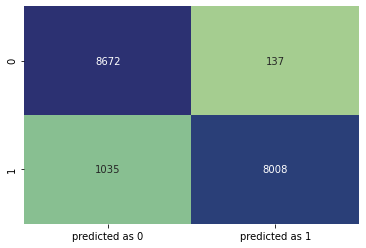

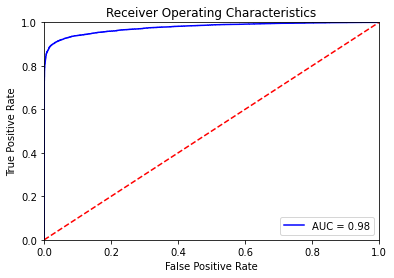

In [159]:
y_pred = rfc_hyp.predict(xtest)
y_prob = rfc_hyp.predict_proba(xtest)[:,1]
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report

acc_rfc = accuracy_score(ytest_smote,y_pred)
pre_rfc = precision_score(ytest_smote,y_pred)
rec_rfc = recall_score(ytest_smote,y_pred)
f1_rfc = f1_score(ytest_smote,y_pred)
roc_rfc = roc_auc_score(ytest_smote,y_prob)

print('Accuracy Score : ' + str(accuracy_score(ytest_smote,y_pred)))
print('Precision Score : ' + str(precision_score(ytest_smote,y_pred)))
print('Recall Score : ' + str(recall_score(ytest_smote,y_pred)))
print('F1 Score : ' + str(f1_score(ytest_smote,y_pred)))
print('AUC Score : ' + str(roc_auc_score(ytest_smote,y_prob)))


#Logistic Regression Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(ytest_smote, y_pred), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(ytest_smote, y_prob)
roc_score = roc_auc_score(ytest_smote,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### So with our hyper tuned Random Forest Model, we haave achieved a final accuracy of 93.43, which is quite significant especially in Healthcare Analytics

#### For our business purpose it is also important that precision and recall should have good scores. 

#### Precision is the fraction of correct positives among the total predicted positives. It is also called the accuracy of positive predictions. In our case, this would mean what fraction were actually readmitted out of all the people the model predicted would be readmitted.

#### Recall is the fraction of correct positives among the total positives in the dataset. It is indicating how many total positives of the actual dataset were covered(classified correctly) while doing prediction. In our case, recall would be what fraction our model predicted would be readmitted out of all the readmissions. High recall indicates that the class is correctly recognized.

#### From the final model, we can infer that Age, discharge_disposition_id, hospital_utlization, time_in_hospital are the most important features

***Specifically patients visits more than 5 are playing major role in this use case***

***Time in hospital more than 3 days in a month was also among the key drivers***

#### The solution implemented in the entire series can by no means said to be perfect. There are other innumerable ways in which the solution can be approached. Different feature selection methods to use, tuning other hyperparameters, transformations of individual predictor variables, etc. are few of the many other techniques which could be tested. A secondary data set where we could have more information on predictor variables which had huge missing values in our data set is also one approach that could improve the overall accuracy of a model.

#### From the business / hospital management point of view, we see that our model places high importance on the age and time spent by the patient in the hospital. Also, how much hospital services a patient has utilized in the previous year and the status of the patient being discharged to another facility are important indicators of the chances of a patient being readmitted. The hospital management can better scrutinize these important features for a patient record and bring down the overall readmission rates for the hospital.